In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('state_union')

[nltk_data] Downloading package punkt to /Users/ceciliali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [2]:
# Read the script
script = pd.read_csv('ultron.csv')
script.head()

Unnamed: 0     character  \
0        6653     ANNOUNCER   
1        6654    TONY STARK   
2        6655  STEVE ROGERS   
3        6656        JARVIS   
4        6657          THOR   

                                                line                    movie  
0  Report to your stations immediately. This is n...  Avengers: Age of Ultron  
1                                              Shit!  Avengers: Age of Ultron  
2   Language! JARVIS, what's the view from upstairs?  Avengers: Age of Ultron  
3  The central building is protected by some kind...  Avengers: Age of Ultron  
4  Loki's scepter must be here. Strucker couldn't...  Avengers: Age of Ultron

In [3]:
script = script.drop(['movie'], axis=1)
script.head()

Unnamed: 0     character                                               line
0        6653     ANNOUNCER  Report to your stations immediately. This is n...
1        6654    TONY STARK                                              Shit!
2        6655  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?
3        6656        JARVIS  The central building is protected by some kind...
4        6657          THOR  Loki's scepter must be here. Strucker couldn't...

In [4]:
script = script.rename(columns={'Unnamed: 0': 'lineNum'})
# Reset lineNum
script['lineNum'] = np.arange(1, len(script)+1)
script.head()

lineNum     character                                               line
0        1     ANNOUNCER  Report to your stations immediately. This is n...
1        2    TONY STARK                                              Shit!
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?
3        4        JARVIS  The central building is protected by some kind...
4        5          THOR  Loki's scepter must be here. Strucker couldn't...

In [5]:
# Cleaning the text
# Define a function to clean the text
# def clean(text):
# # Removes all special characters and numericals leaving the alphabets
#     text = re.sub('[^A-Za-z]+', ' ', text)
#     return text

# # Cleaning the text in the review column
# script['clean_line'] = script['line'].apply(clean)

# Remove punctuation 
script['clean_line'] = script['line'].str.replace('[^\w\s]','')
script.head()

/var/folders/mk/x97yxl6121bfr4x7_4d7xfyc0000gn/T/ipykernel_39031/3066775154.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  script['clean_line'] = script['line'].str.replace('[^\w\s]','')


lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  
0  Report to your stations immediately This is no...  
1                                               Shit  
2       Language JARVIS whats the view from upstairs  
3  The central building is protected by some kind...  
4  Lokis scepter must be here Strucker couldnt mo...

In [6]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

# Tokenization and POS tagging
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

script['POS tagged'] = script['clean_line'].apply(token_stop_pos)
script.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  
0  [(Report, n), (stations, n), (immediately, r),...  
1                                        [(Shit, n)]  
2  [(Language, n), (JARVIS, n), (whats, v), (view...  
3  [(central, a), (building, n), (protected, v), ...  
4  [(Lokis, n), (scepter, n), (must, None), (Stru...

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

script['Lemma'] = script['POS tagged'].apply(lemmatize)
script.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  
0     Report station immediately drill attack attack  
1                                               Shit  
2                Language JARVIS whats view upstairs  
3    central building protect kind energy shield ...  
4    Lokis scepter must Strucker couldnt mount de...

# Part 1: Text analysis

## Wordcloud

In [8]:
cloud = pd.DataFrame(script[['lineNum', 'line', 'Lemma']])
cloud

lineNum                                               line  \
0          1  Report to your stations immediately. This is n...   
1          2                                              Shit!   
2          3   Language! JARVIS, what's the view from upstairs?   
3          4  The central building is protected by some kind...   
4          5  Loki's scepter must be here. Strucker couldn't...   
..       ...                                                ...   
955      956                            We've got some hitters.   
956      957                  They're good. They're not a team.   
957      958                         Let's beat 'em into shape.   
958      959                                       Avengers...!   
959      960                           Fine, I'll do it myself.   

                                                 Lemma  
0       Report station immediately drill attack attack  
1                                                 Shit  
2                  Language JARVIS whats view upstairs  
3      central building protect kind energy shield ...  
4      Lokis scepter must Strucker couldnt mount de...  
..                                                 ...  
955                                    Weve get hitter  
956                            Theyre good Theyre team  
957                                 Lets beat em shape  
958                                           Avengers  
959                                           Fine Ill  

[960 rows x 3 columns]

In [9]:
# Concatenate all lines
lines = " ".join(clean_line for clean_line in cloud['Lemma'])

In [10]:
len(lines)

34514

In [11]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
len(STOPWORDS)

lines = remove_stopwords(lines)
len(lines)

27902

In [12]:
# Tokenize the words
from nltk.tokenize import word_tokenize
tokens  = word_tokenize(lines)
len(tokens)

4593

In [13]:
# Make all words small letters
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

In [14]:
from nltk.corpus import stopwords
stop_words   = (stopwords.words('english'))
len(stop_words)

filtered_words = [w for w in tokens if not w in stop_words]
len(filtered_words)

4593

In [15]:
import spacy
en = spacy.load('en_core_web_sm')
spacy_stop_words = en.Defaults.stop_words
len(spacy_stop_words)

filtered_words2 = [w for w in filtered_words if not w in spacy_stop_words]
len(filtered_words2)

4461

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
len(ENGLISH_STOP_WORDS)

filtered_words3 = [w for w in filtered_words2 if not w in ENGLISH_STOP_WORDS]
len(filtered_words3)

4459

In [17]:
# Manually input extra words
extra_words=['im', 'get', 'go', 'know', 'dont', 'youre', 'na', 'think', 'right', 'yeah', 'thats', 'tell', 'gon',
            'okay', 'hey', 'whats', 'youll', 'ill', 'didnt', 'hes', 'wan', 'ive', 'theres', 'id', 'uh', 'oh', 'look',
            'want', 'need', 'let', 'ta']

filtered_words4 = [w for w in filtered_words3 if not w in extra_words]
filtered_words4[1:10]

['station',
 'immediately',
 'drill',
 'attack',
 'attack',
 'shit',
 'language',
 'jarvis',
 'view']

In [18]:
len(filtered_words4)

3693

In [19]:
string_text = ' '.join(filtered_words4)   

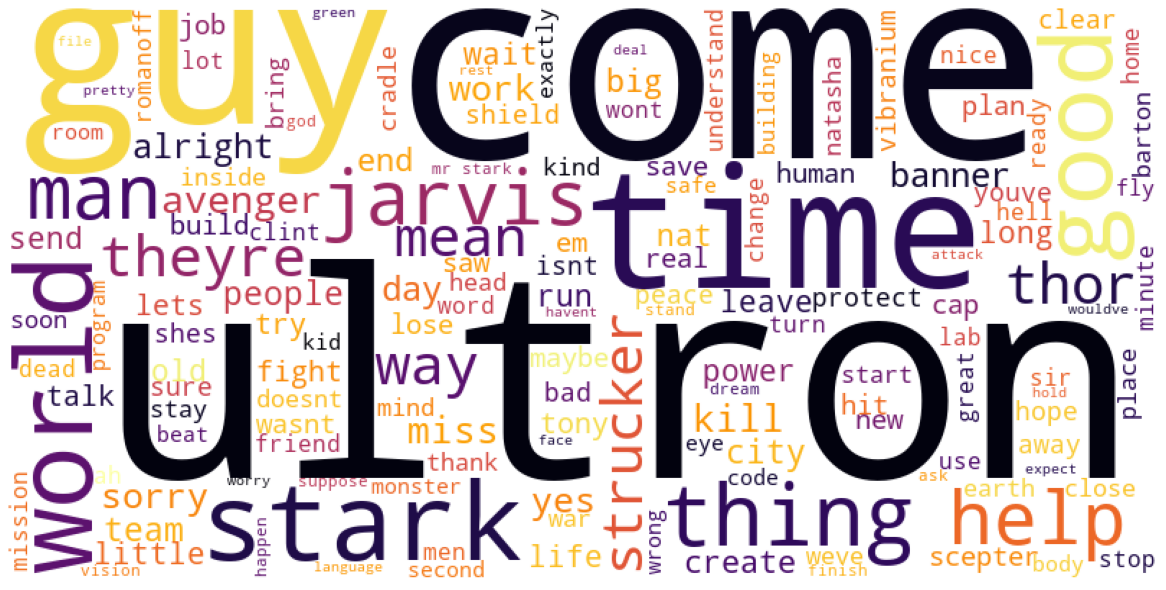

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=200, min_font_size=10, max_words=150, background_color="white",
                      colormap='inferno',
                     width=800, height=400, prefer_horizontal=0.99).generate(string_text)
                                                                            
# Display the generated image:
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
freq = nltk.FreqDist(filtered_words4)

freq.most_common(20)

[('come', 39),
 ('ultron', 36),
 ('time', 34),
 ('like', 33),
 ('stark', 31),
 ('guy', 29),
 ('world', 29),
 ('good', 24),
 ('thing', 22),
 ('jarvis', 21),
 ('help', 20),
 ('man', 20),
 ('theyre', 19),
 ('way', 19),
 ('mean', 18),
 ('kill', 17),
 ('miss', 17),
 ('yes', 16),
 ('thor', 16),
 ('work', 16)]

## Network to analysis characters' relationship


In [22]:
network = script.copy()
network

lineNum         character  \
0          1         ANNOUNCER   
1          2        TONY STARK   
2          3      STEVE ROGERS   
3          4            JARVIS   
4          5              THOR   
..       ...               ...   
955      956  NATASHA ROMANOFF   
956      957      STEVE ROGERS   
957      958  NATASHA ROMANOFF   
958      959      STEVE ROGERS   
959      960            THANOS   

                                                  line  \
0    Report to your stations immediately. This is n...   
1                                                Shit!   
2     Language! JARVIS, what's the view from upstairs?   
3    The central building is protected by some kind...   
4    Loki's scepter must be here. Strucker couldn't...   
..                                                 ...   
955                            We've got some hitters.   
956                  They're good. They're not a team.   
957                         Let's beat 'em into shape.   
958                                       Avengers...!   
959                           Fine, I'll do it myself.   

                                            clean_line  \
0    Report to your stations immediately This is no...   
1                                                 Shit   
2         Language JARVIS whats the view from upstairs   
3    The central building is protected by some kind...   
4    Lokis scepter must be here Strucker couldnt mo...   
..                                                 ...   
955                              Weve got some hitters   
956                      Theyre good Theyre not a team   
957                            Lets beat em into shape   
958                                           Avengers   
959                              Fine Ill do it myself   

                                            POS tagged  \
0    [(Report, n), (stations, n), (immediately, r),...   
1                                          [(Shit, n)]   
2    [(Language, n), (JARVIS, n), (whats, v), (view...   
3    [(central, a), (building, n), (protected, v), ...   
4    [(Lokis, n), (scepter, n), (must, None), (Stru...   
..                                                 ...   
955                [(Weve, n), (got, v), (hitters, n)]   
956   [(Theyre, n), (good, a), (Theyre, n), (team, n)]   
957        [(Lets, n), (beat, v), (em, a), (shape, n)]   
958                                    [(Avengers, n)]   
959                              [(Fine, n), (Ill, n)]   

                                                 Lemma  
0       Report station immediately drill attack attack  
1                                                 Shit  
2                  Language JARVIS whats view upstairs  
3      central building protect kind energy shield ...  
4      Lokis scepter must Strucker couldnt mount de...  
..                                                 ...  
955                                    Weve get hitter  
956                            Theyre good Theyre team  
957                                 Lets beat em shape  
958                                           Avengers  
959                                           Fine Ill  

[960 rows x 6 columns]

In [23]:
# Combine character and line 
network['char_line'] = network['character'] + network['Lemma']
network

lineNum         character  \
0          1         ANNOUNCER   
1          2        TONY STARK   
2          3      STEVE ROGERS   
3          4            JARVIS   
4          5              THOR   
..       ...               ...   
955      956  NATASHA ROMANOFF   
956      957      STEVE ROGERS   
957      958  NATASHA ROMANOFF   
958      959      STEVE ROGERS   
959      960            THANOS   

                                                  line  \
0    Report to your stations immediately. This is n...   
1                                                Shit!   
2     Language! JARVIS, what's the view from upstairs?   
3    The central building is protected by some kind...   
4    Loki's scepter must be here. Strucker couldn't...   
..                                                 ...   
955                            We've got some hitters.   
956                  They're good. They're not a team.   
957                         Let's beat 'em into shape.   
958                                       Avengers...!   
959                           Fine, I'll do it myself.   

                                            clean_line  \
0    Report to your stations immediately This is no...   
1                                                 Shit   
2         Language JARVIS whats the view from upstairs   
3    The central building is protected by some kind...   
4    Lokis scepter must be here Strucker couldnt mo...   
..                                                 ...   
955                              Weve got some hitters   
956                      Theyre good Theyre not a team   
957                            Lets beat em into shape   
958                                           Avengers   
959                              Fine Ill do it myself   

                                            POS tagged  \
0    [(Report, n), (stations, n), (immediately, r),...   
1                                          [(Shit, n)]   
2    [(Language, n), (JARVIS, n), (whats, v), (view...   
3    [(central, a), (building, n), (protected, v), ...   
4    [(Lokis, n), (scepter, n), (must, None), (Stru...   
..                                                 ...   
955                [(Weve, n), (got, v), (hitters, n)]   
956   [(Theyre, n), (good, a), (Theyre, n), (team, n)]   
957        [(Lets, n), (beat, v), (em, a), (shape, n)]   
958                                    [(Avengers, n)]   
959                              [(Fine, n), (Ill, n)]   

                                                 Lemma  \
0       Report station immediately drill attack attack   
1                                                 Shit   
2                  Language JARVIS whats view upstairs   
3      central building protect kind energy shield ...   
4      Lokis scepter must Strucker couldnt mount de...   
..                                                 ...   
955                                    Weve get hitter   
956                            Theyre good Theyre team   
957                                 Lets beat em shape   
958                                           Avengers   
959                                           Fine Ill   

                                             char_line  
0    ANNOUNCER  Report station immediately drill at...  
1                                     TONY STARK  Shit  
2    STEVE ROGERS  Language JARVIS whats view upstairs  
3    JARVIS  central building protect kind energy s...  
4    THOR  Lokis scepter must Strucker couldnt moun...  
..                                                 ...  
955                  NATASHA ROMANOFF  Weve get hitter  
956              STEVE ROGERS  Theyre good Theyre team  
957               NATASHA ROMANOFF  Lets beat em shape  
958                             STEVE ROGERS  Avengers  
959                                   THANOS  Fine Ill  

[960 rows x 7 columns]

In [24]:
# List of characters
network['character_word_by_word'] = network['character'].str.split(' ')
network['character_word_by_word'] = tuple(list(network['character_word_by_word']))
network

lineNum         character  \
0          1         ANNOUNCER   
1          2        TONY STARK   
2          3      STEVE ROGERS   
3          4            JARVIS   
4          5              THOR   
..       ...               ...   
955      956  NATASHA ROMANOFF   
956      957      STEVE ROGERS   
957      958  NATASHA ROMANOFF   
958      959      STEVE ROGERS   
959      960            THANOS   

                                                  line  \
0    Report to your stations immediately. This is n...   
1                                                Shit!   
2     Language! JARVIS, what's the view from upstairs?   
3    The central building is protected by some kind...   
4    Loki's scepter must be here. Strucker couldn't...   
..                                                 ...   
955                            We've got some hitters.   
956                  They're good. They're not a team.   
957                         Let's beat 'em into shape.   
958                                       Avengers...!   
959                           Fine, I'll do it myself.   

                                            clean_line  \
0    Report to your stations immediately This is no...   
1                                                 Shit   
2         Language JARVIS whats the view from upstairs   
3    The central building is protected by some kind...   
4    Lokis scepter must be here Strucker couldnt mo...   
..                                                 ...   
955                              Weve got some hitters   
956                      Theyre good Theyre not a team   
957                            Lets beat em into shape   
958                                           Avengers   
959                              Fine Ill do it myself   

                                            POS tagged  \
0    [(Report, n), (stations, n), (immediately, r),...   
1                                          [(Shit, n)]   
2    [(Language, n), (JARVIS, n), (whats, v), (view...   
3    [(central, a), (building, n), (protected, v), ...   
4    [(Lokis, n), (scepter, n), (must, None), (Stru...   
..                                                 ...   
955                [(Weve, n), (got, v), (hitters, n)]   
956   [(Theyre, n), (good, a), (Theyre, n), (team, n)]   
957        [(Lets, n), (beat, v), (em, a), (shape, n)]   
958                                    [(Avengers, n)]   
959                              [(Fine, n), (Ill, n)]   

                                                 Lemma  \
0       Report station immediately drill attack attack   
1                                                 Shit   
2                  Language JARVIS whats view upstairs   
3      central building protect kind energy shield ...   
4      Lokis scepter must Strucker couldnt mount de...   
..                                                 ...   
955                                    Weve get hitter   
956                            Theyre good Theyre team   
957                                 Lets beat em shape   
958                                           Avengers   
959                                           Fine Ill   

                                             char_line character_word_by_word  
0    ANNOUNCER  Report station immediately drill at...            [ANNOUNCER]  
1                                     TONY STARK  Shit          [TONY, STARK]  
2    STEVE ROGERS  Language JARVIS whats view upstairs        [STEVE, ROGERS]  
3    JARVIS  central building protect kind energy s...               [JARVIS]  
4    THOR  Lokis scepter must Strucker couldnt moun...                 [THOR]  
..                                                 ...                    ...  
955                  NATASHA ROMANOFF  Weve get hitter    [NATASHA, ROMANOFF]  
956              STEVE ROGERS  Theyre good Theyre team        [STEVE, ROGERS]  
957               NATASHA ROMANOFF  Lets beat em shape    [NATASHA, ROMANOFF]  
958     

In [25]:
# Replace space with underscore for characters
network['character'] = network['character'].str.replace(" ", "_")
network

lineNum         character  \
0          1         ANNOUNCER   
1          2        TONY_STARK   
2          3      STEVE_ROGERS   
3          4            JARVIS   
4          5              THOR   
..       ...               ...   
955      956  NATASHA_ROMANOFF   
956      957      STEVE_ROGERS   
957      958  NATASHA_ROMANOFF   
958      959      STEVE_ROGERS   
959      960            THANOS   

                                                  line  \
0    Report to your stations immediately. This is n...   
1                                                Shit!   
2     Language! JARVIS, what's the view from upstairs?   
3    The central building is protected by some kind...   
4    Loki's scepter must be here. Strucker couldn't...   
..                                                 ...   
955                            We've got some hitters.   
956                  They're good. They're not a team.   
957                         Let's beat 'em into shape.   
958                                       Avengers...!   
959                           Fine, I'll do it myself.   

                                            clean_line  \
0    Report to your stations immediately This is no...   
1                                                 Shit   
2         Language JARVIS whats the view from upstairs   
3    The central building is protected by some kind...   
4    Lokis scepter must be here Strucker couldnt mo...   
..                                                 ...   
955                              Weve got some hitters   
956                      Theyre good Theyre not a team   
957                            Lets beat em into shape   
958                                           Avengers   
959                              Fine Ill do it myself   

                                            POS tagged  \
0    [(Report, n), (stations, n), (immediately, r),...   
1                                          [(Shit, n)]   
2    [(Language, n), (JARVIS, n), (whats, v), (view...   
3    [(central, a), (building, n), (protected, v), ...   
4    [(Lokis, n), (scepter, n), (must, None), (Stru...   
..                                                 ...   
955                [(Weve, n), (got, v), (hitters, n)]   
956   [(Theyre, n), (good, a), (Theyre, n), (team, n)]   
957        [(Lets, n), (beat, v), (em, a), (shape, n)]   
958                                    [(Avengers, n)]   
959                              [(Fine, n), (Ill, n)]   

                                                 Lemma  \
0       Report station immediately drill attack attack   
1                                                 Shit   
2                  Language JARVIS whats view upstairs   
3      central building protect kind energy shield ...   
4      Lokis scepter must Strucker couldnt mount de...   
..                                                 ...   
955                                    Weve get hitter   
956                            Theyre good Theyre team   
957                                 Lets beat em shape   
958                                           Avengers   
959                                           Fine Ill   

                                             char_line character_word_by_word  
0    ANNOUNCER  Report station immediately drill at...            [ANNOUNCER]  
1                                     TONY STARK  Shit          [TONY, STARK]  
2    STEVE ROGERS  Language JARVIS whats view upstairs        [STEVE, ROGERS]  
3    JARVIS  central building protect kind energy s...               [JARVIS]  
4    THOR  Lokis scepter must Strucker couldnt moun...                 [THOR]  
..                                                 ...                    ...  
955                  NATASHA ROMANOFF  Weve get hitter    [NATASHA, ROMANOFF]  
956              STEVE ROGERS  Theyre good Theyre team        [STEVE, ROGERS]  
957               NATASHA ROMANOFF  Lets beat em shape    [NATASHA, ROMANOFF]  
958     

In [26]:
# Distinct characters
character_list = network['character'].unique()
char = character_list.tolist()
type(char)

list

In [27]:
numCharacters = len(char)
numCharacters

38

In [28]:
# Dictionary for characters
character_map = {}
for i in range(numCharacters):
    character_map[i] = char[i]

character_map

{0: 'ANNOUNCER',
 1: 'TONY_STARK',
 2: 'STEVE_ROGERS',
 3: 'JARVIS',
 4: 'THOR',
 5: 'NATASHA_ROMANOFF',
 6: 'CLINT_BARTON',
 7: 'BARON_WOLFGANG_VON_STRUCKER',
 8: 'FORTRESS_SOLDIER',
 9: 'DR._LIST',
 10: 'IRON_LEGION',
 11: 'SOLDIERS',
 12: 'PIETRO_MAXIMOFF',
 13: 'BRUCE_BANNER',
 14: 'MARIA_HILL',
 15: 'DR._HELEN_CHO',
 16: 'ULTRON',
 17: 'JAMES_RHODES',
 18: 'SAM_WILSON',
 19: 'PARTY_GUEST',
 20: 'STAN_LEE',
 21: 'WANDA_MAXIMOFF',
 22: 'ULYSSES_KLAUE',
 23: "KLAUE'S_MERCENARY",
 24: 'BALLET_INSTRUCTOR',
 25: 'MADAME_B',
 26: 'PEGGY_CARTER',
 27: 'HEIMDALL',
 28: 'LAURA_BARTON',
 29: 'LILA_BARTON',
 30: 'NICK_FURY',
 31: 'ERIK_SELVIG',
 32: 'WORLD_HUB_TECH',
 33: 'VISION',
 34: 'FRIDAY',
 35: 'SPECIALIST_CAMERON_KLEIN',
 36: 'ZRINKA',
 37: 'THANOS'}

In [29]:
# Combine char_line columns into a string
all_char_line = " ".join(char_line for char_line in network['char_line'])
# all_char_line

# # Tokenize all_char_line
# char_line_token  = word_tokenize(all_char_line)

In [30]:
token_exception = []
for i in range(len(network)):
    token_exception.append(tuple(network.loc[i, 'character_word_by_word']))

In [31]:
# Tokenize all_char_line except for characters
from nltk.tokenize import MWETokenizer
tokenizer=MWETokenizer(token_exception)

char_line_token = tokenizer.tokenize(all_char_line.split())

In [32]:
# Find occurence of each character 
k=0;
numOccurrences=pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] =char_line_token.count(character)
    k=k+1

In [33]:
numOccurrences

0       1
1     173
2     133
3      43
4      55
5      79
6      69
7      12
8       4
9       4
10      4
11      1
12     24
13     83
14     24
15     17
16     81
17     20
18      4
19      1
20      2
21     36
22      7
23      2
24      1
25      4
26      3
27      4
28     16
29      2
30     26
31      6
32      1
33     19
34     15
35      3
36      1
37      1
dtype: int64

Text(0, 0.5, 'Number of occurence')

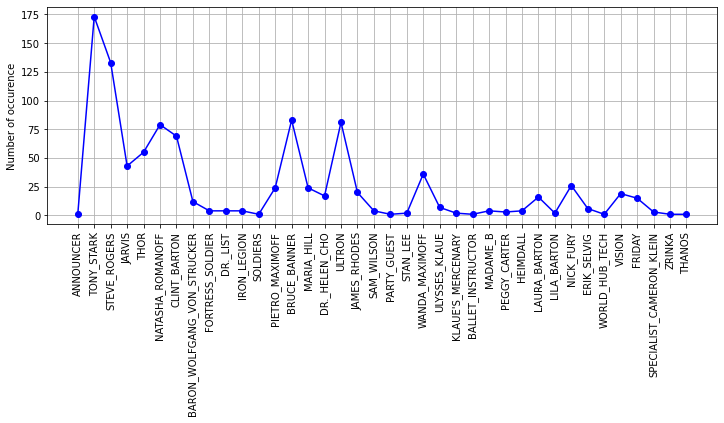

In [34]:
fig   = plt.figure(figsize = (12, 4))
plt.style.use('default')
ax    = fig.add_subplot(111)
plt.plot(numOccurrences,'b-o')
plt.xticks(np.arange(0,numCharacters),character_list)
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=10)
plt.ylabel('Number of occurence')

In [35]:
# Create ndarray with zeros for position of each character
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)     

In [36]:
numCharacters

38

In [37]:
# Iterate over every character and find the position 
for j in range(numCharacters):
    positions_current=[]
    for i in range(len(char_line_token)):
        if char_line_token[i]==character_list[j]:
#             print(i)
            positions_current.append(i)
#     print(positions_current)
    positions_characters[j][:]=positions_current   

In [38]:
#positions_characters[1]

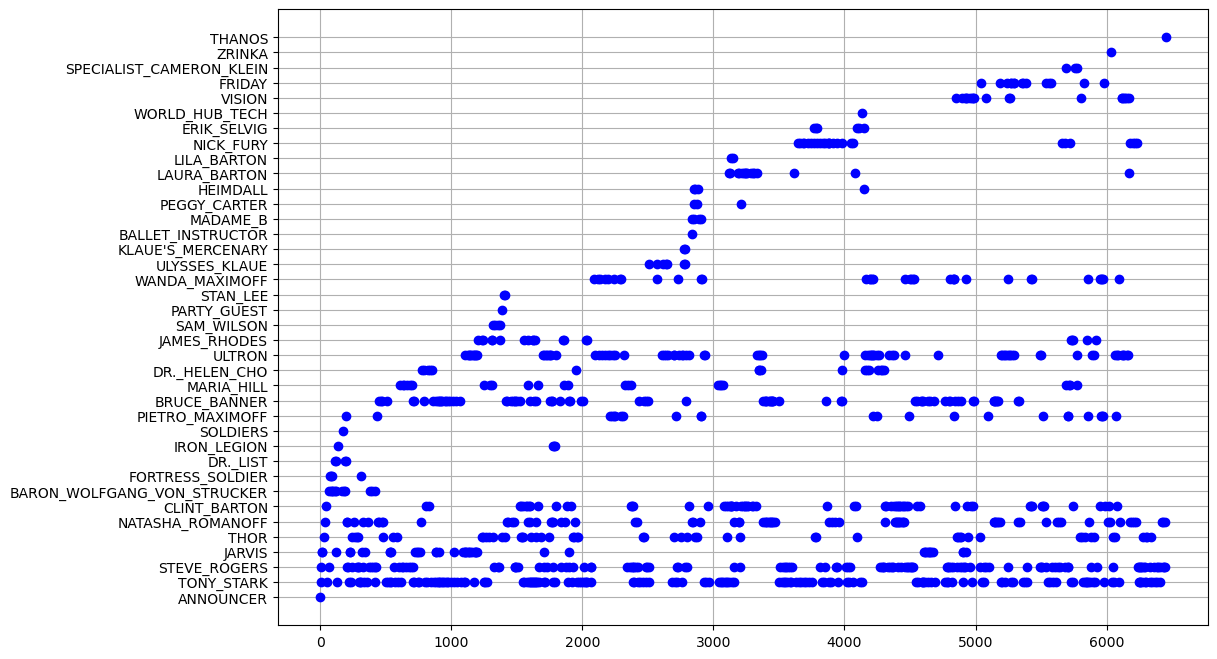

In [39]:
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)
for j in range(0,numCharacters):
    plt.plot( positions_characters[j],j*np.ones(numOccurrences[j]),'bo')
    
plt.yticks(np.arange(0,numCharacters),character_list)
plt.grid()

In [40]:
# Find the distance between characters
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<200):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)
        
#positions_characters
#interactions_characters

In [41]:
interactions_characters.shape

(38, 38)

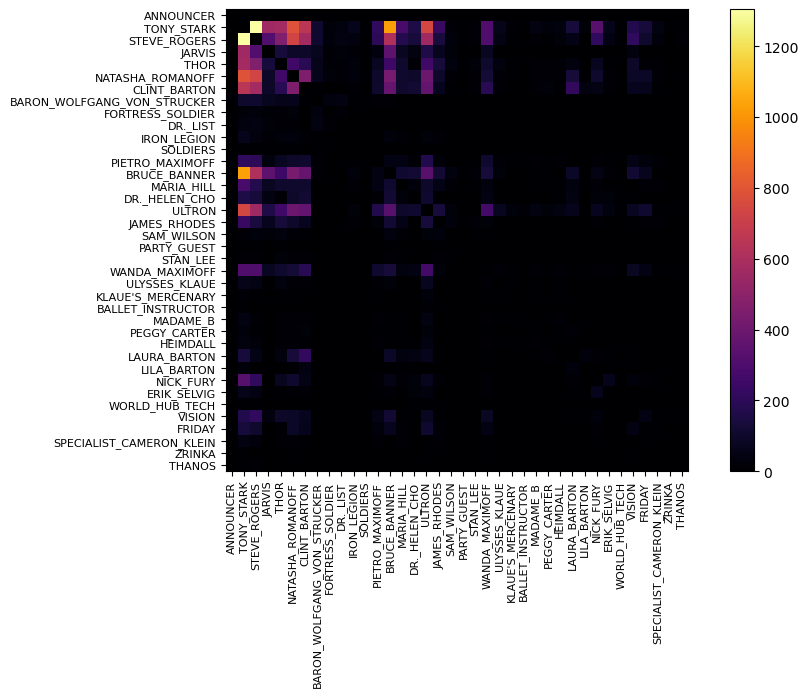

In [42]:
import matplotlib
fig2 = plt.figure(figsize = (11, 6)) 
ax2    = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=matplotlib.cm.inferno) 
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax2.tick_params(axis='x', rotation=90, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

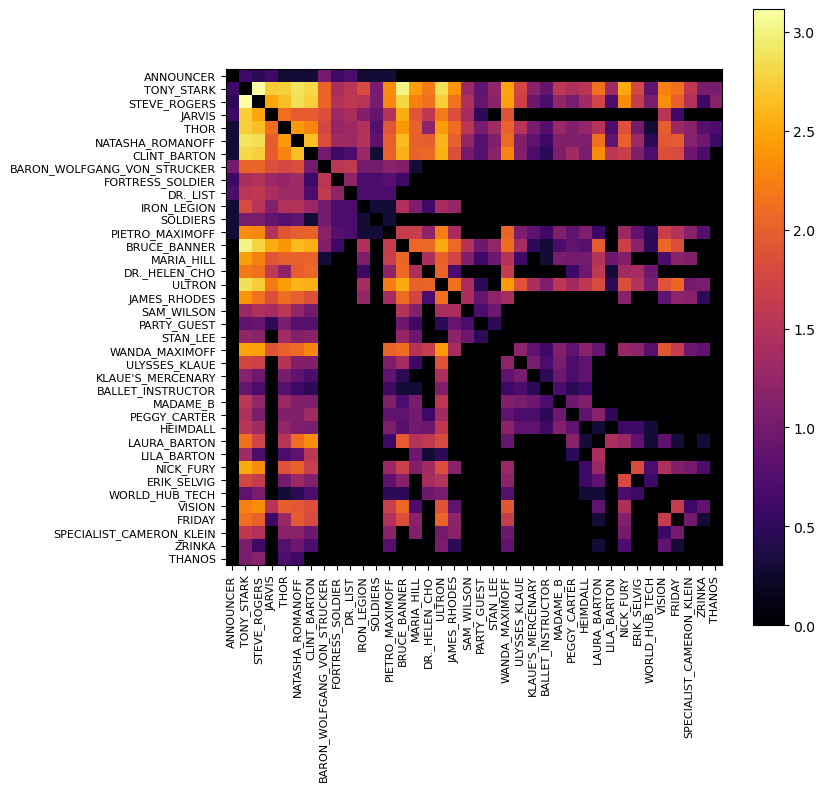

In [43]:
#Take log of the graph
fig3 = plt.figure(figsize = (8, 8)) 
ax3    = fig3.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters),cmap=matplotlib.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax3.tick_params(axis='x', rotation=90, labelsize=8)
ax3.tick_params(axis='y', labelsize=8)

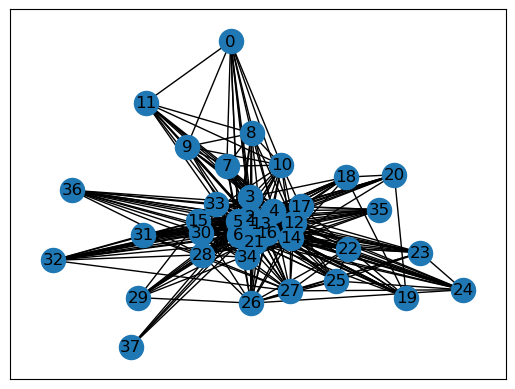

In [44]:
import networkx as nx
G1=nx.from_numpy_matrix(interactions_characters)
nx.draw_networkx(G1)

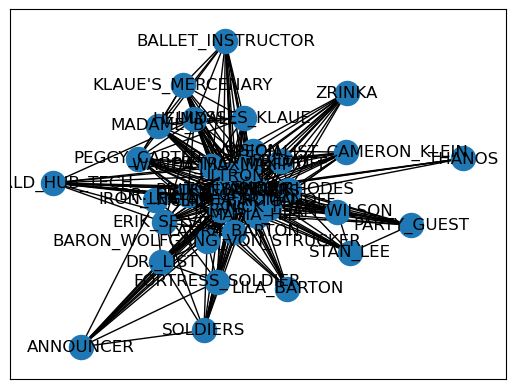

In [45]:
H1 = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1)

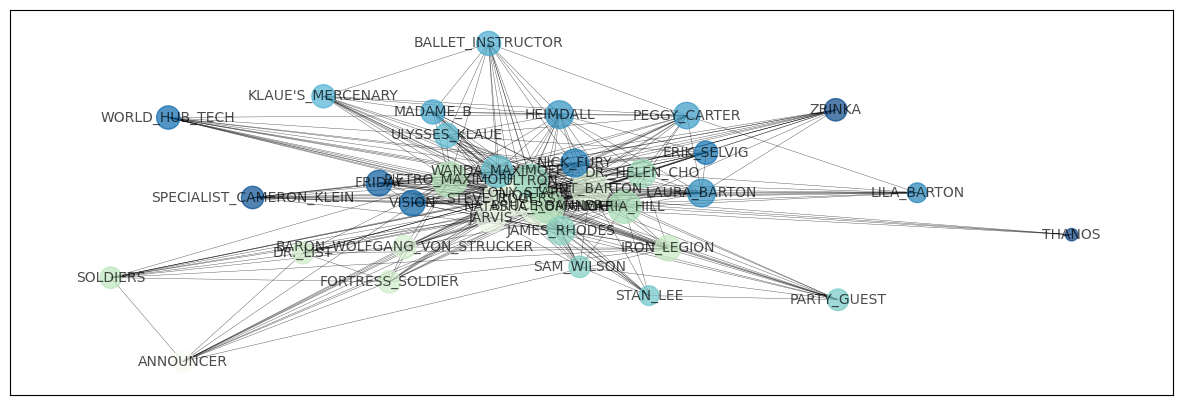

In [46]:
# Change size of node according to degree (number of neighbours)
kdeg  = G1.degree()
fig   = plt.figure(figsize = (15, 5))
ax1   = plt.subplot(111)
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=matplotlib.cm.GnBu
                 ,node_size =[20*val for (node,val) in kdeg])

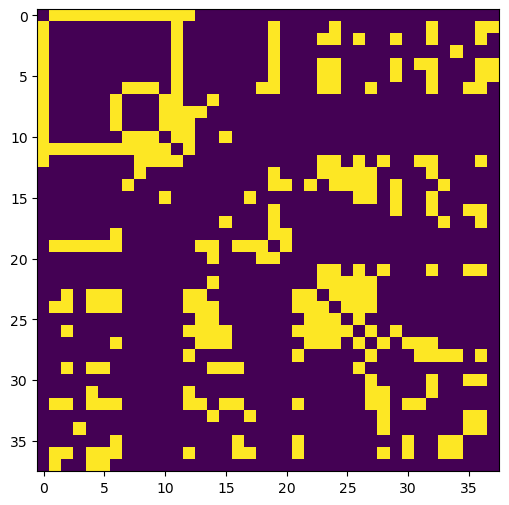

In [47]:
# Adjacency matrix withfcases less than a certain number of occurences
plt.figure(figsize = (11, 6)) 
plt.imshow((interactions_characters<=10)&(interactions_characters>0)) 

In [48]:
# Delete interactions with less than 30 occurences
interactions_characters[interactions_characters<=30]=0
G2=nx.from_numpy_matrix(interactions_characters)

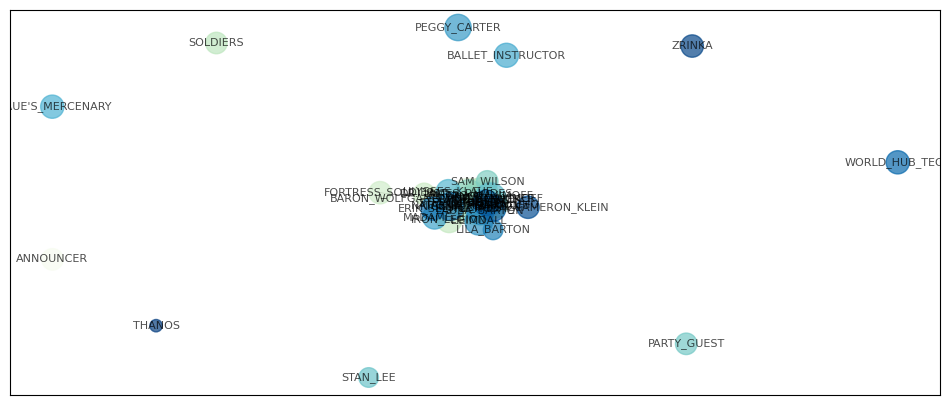

In [49]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(np.log10(1+interactions_characters)), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])


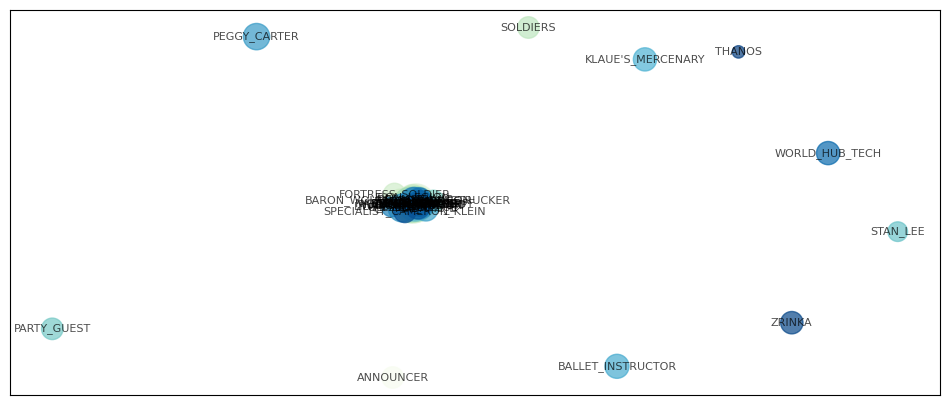

In [50]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(interactions_characters), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])

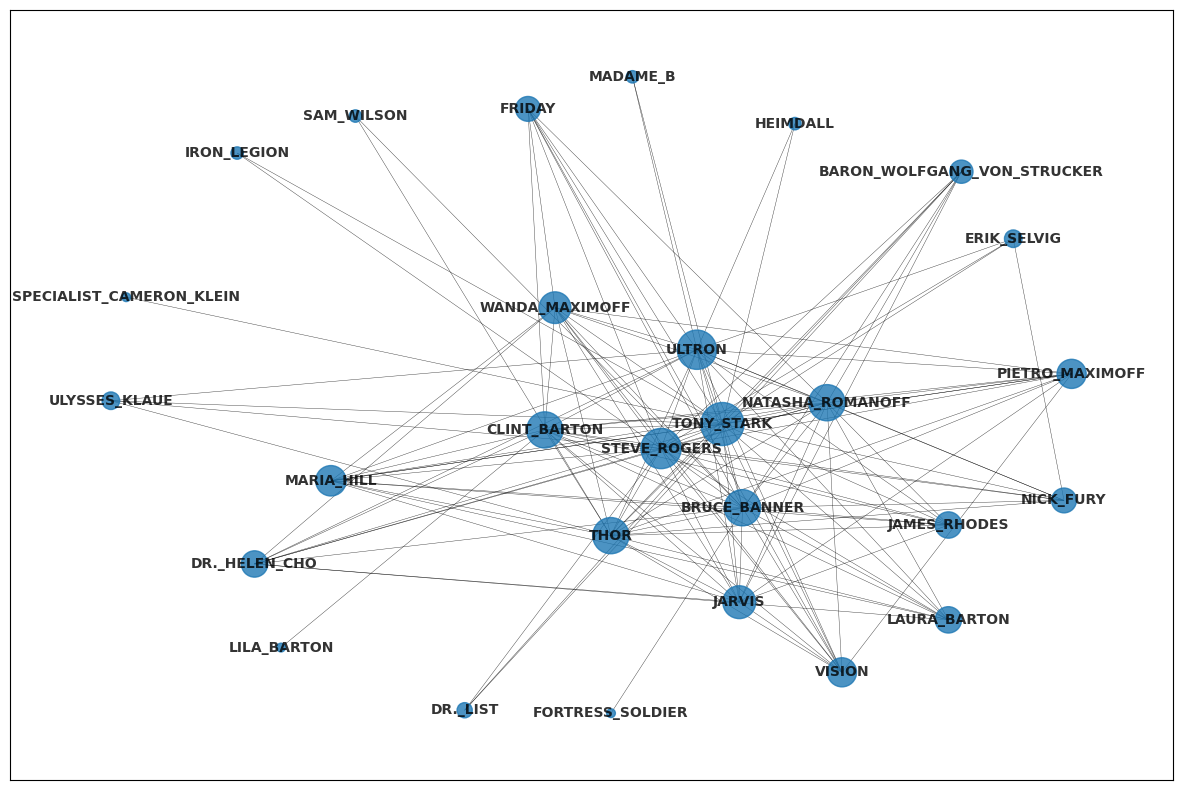

In [51]:
# Only show the largest subset
largestSubgraph = max(nx.connected_components(G2), key = len)
largest_component = G2.subgraph(largestSubgraph)
H3 = nx.relabel_nodes(largest_component, character_map)

pos = nx.spring_layout(H3, k=10)

fig = plt.figure(figsize=(15, 10))
largest_kdeg  = H3.degree()
d = dict(largest_kdeg)

nx.draw_networkx(H3, pos=pos, font_color='black',width=0.3,alpha=0.8, font_weight='bold',
                 font_size=10, cmap=matplotlib.cm.GnBu, node_size =[40*val for (node,val) in largest_kdeg])

In [52]:
type(largest_component)

networkx.classes.graph.Graph

In [53]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1,degree_centrality,'dc')
centralityValues=[v for v in degree_centrality.values()]

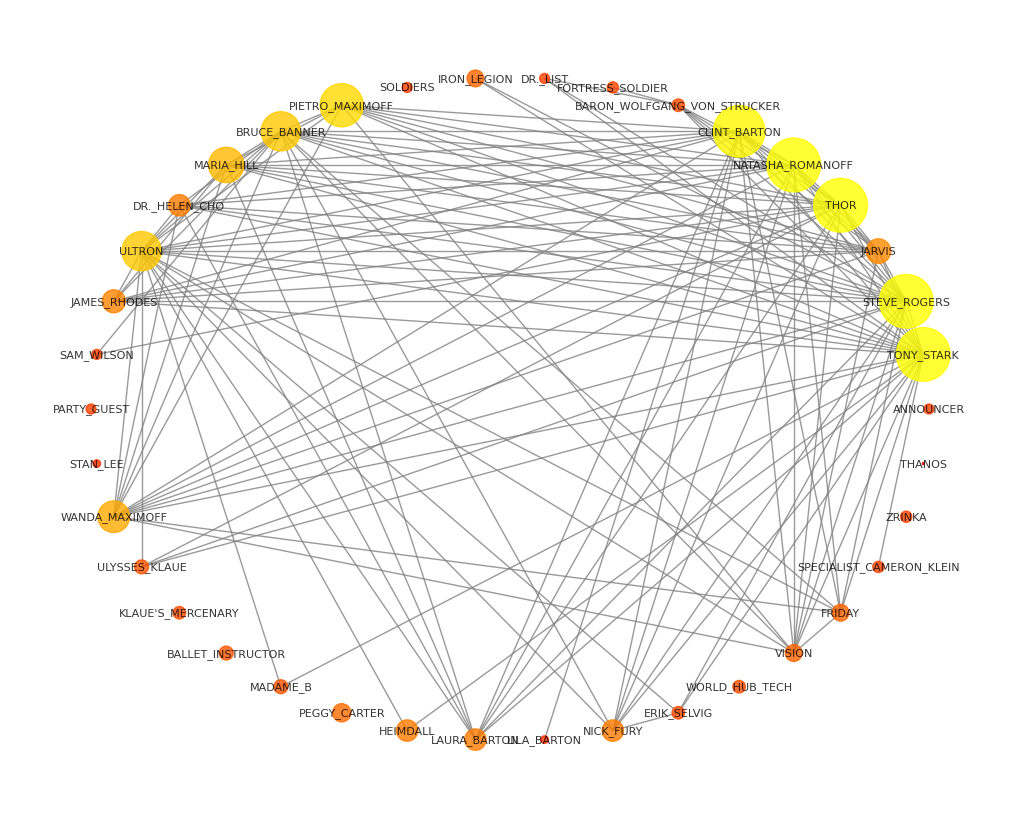

In [54]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=centralityValues,font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.autumn,
                 node_size=[1500*(v**3) for v in degree_centrality.values()])

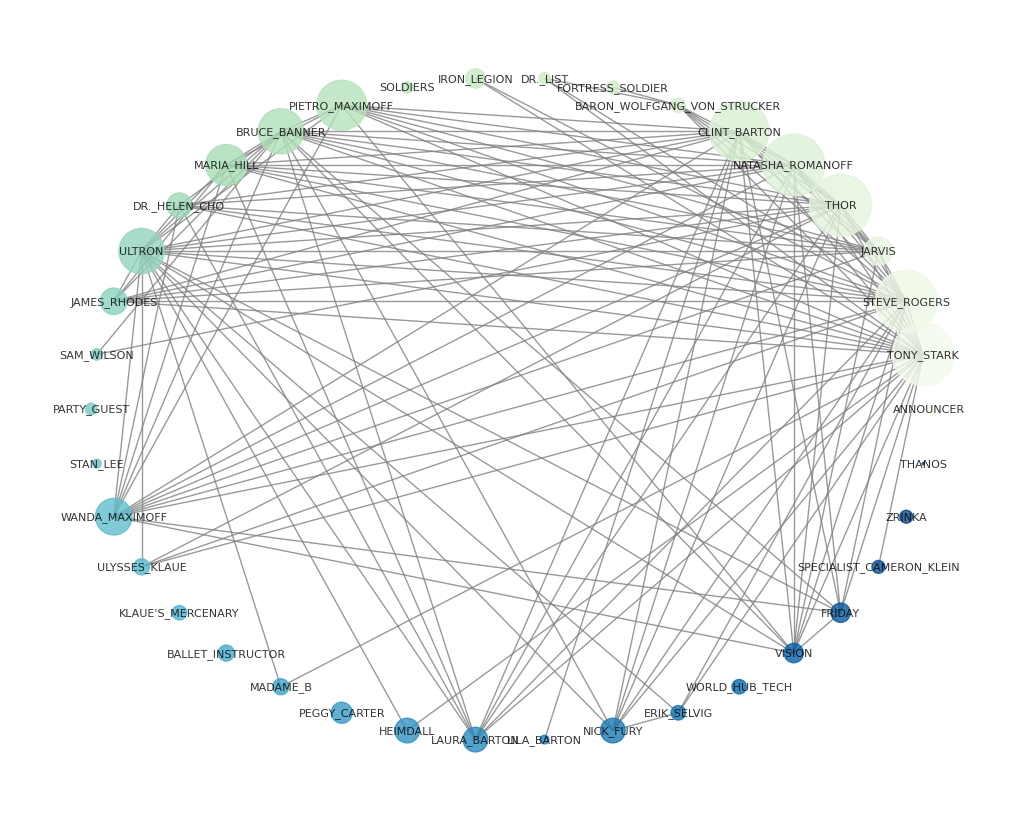

In [55]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[2000*(v**3) for v in degree_centrality.values()])


In [56]:
cliques = list(nx.find_cliques(H3))
cl2 = list(cliques)
len(cl2)

19

In [57]:
# fig   = plt.figure(figsize = (15, 15))
# ax1  = fig.add_subplot(221)
# nx.draw_networkx(H2.subgraph(cl2[0]),font_size=8,font_color='black',node_color='green',edge_color='gray')
# plt.axis('off')
# ax2  = fig.add_subplot(222)
# nx.draw_networkx(H2.subgraph(cl2[10]),font_size=8,font_color='black',node_color='cyan',edge_color='gray')
# plt.axis('off')
# ax3  = fig.add_subplot(223)
# nx.draw_networkx(H2.subgraph(cl2[15]),font_size=8,font_color='black',node_color='yellow',edge_color='gray')
# plt.axis('off')
# ax4  = fig.add_subplot(224)
# nx.draw_networkx(H2.subgraph(cl2[28]),font_size=8,font_color='black',node_color='#ff00ff',edge_color='gray')
# plt.axis('off')

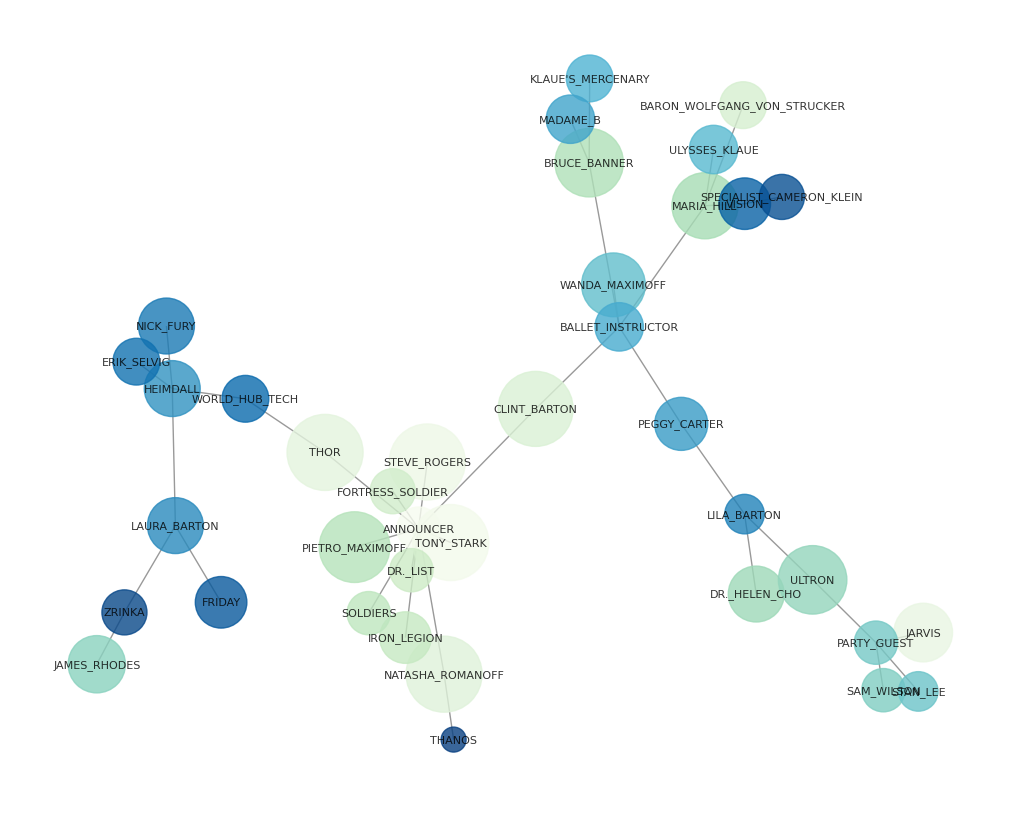

In [58]:
T = nx.minimum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])


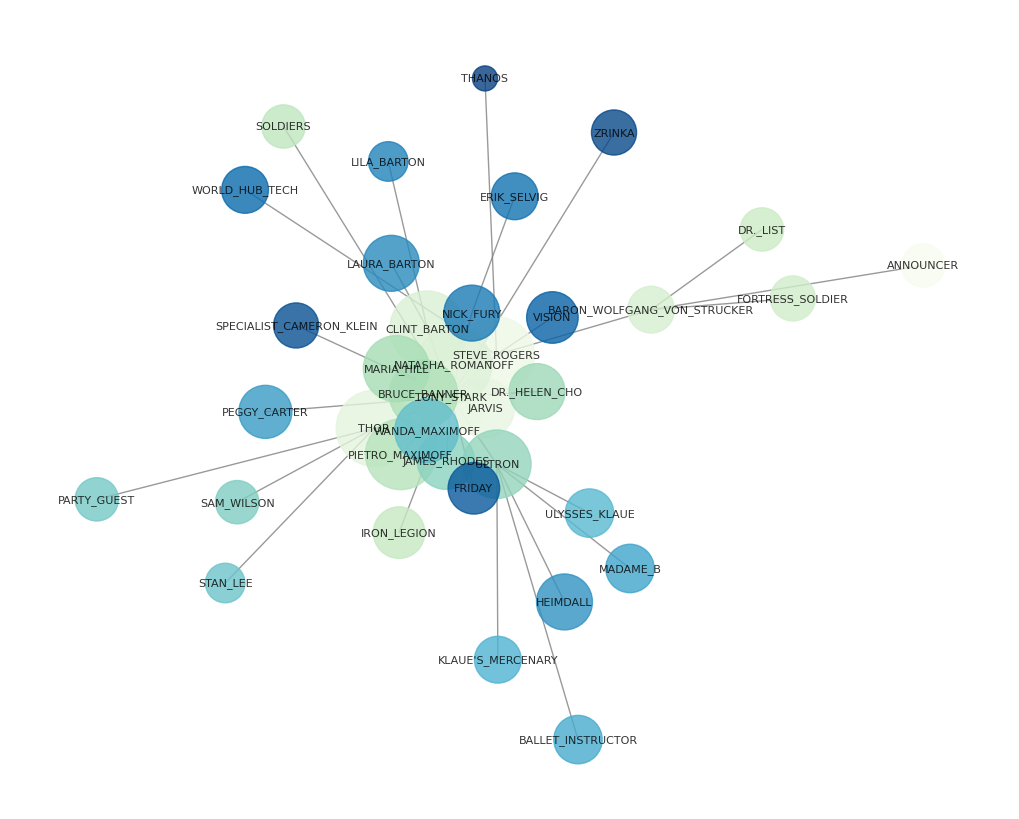

In [59]:
T = nx.maximum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

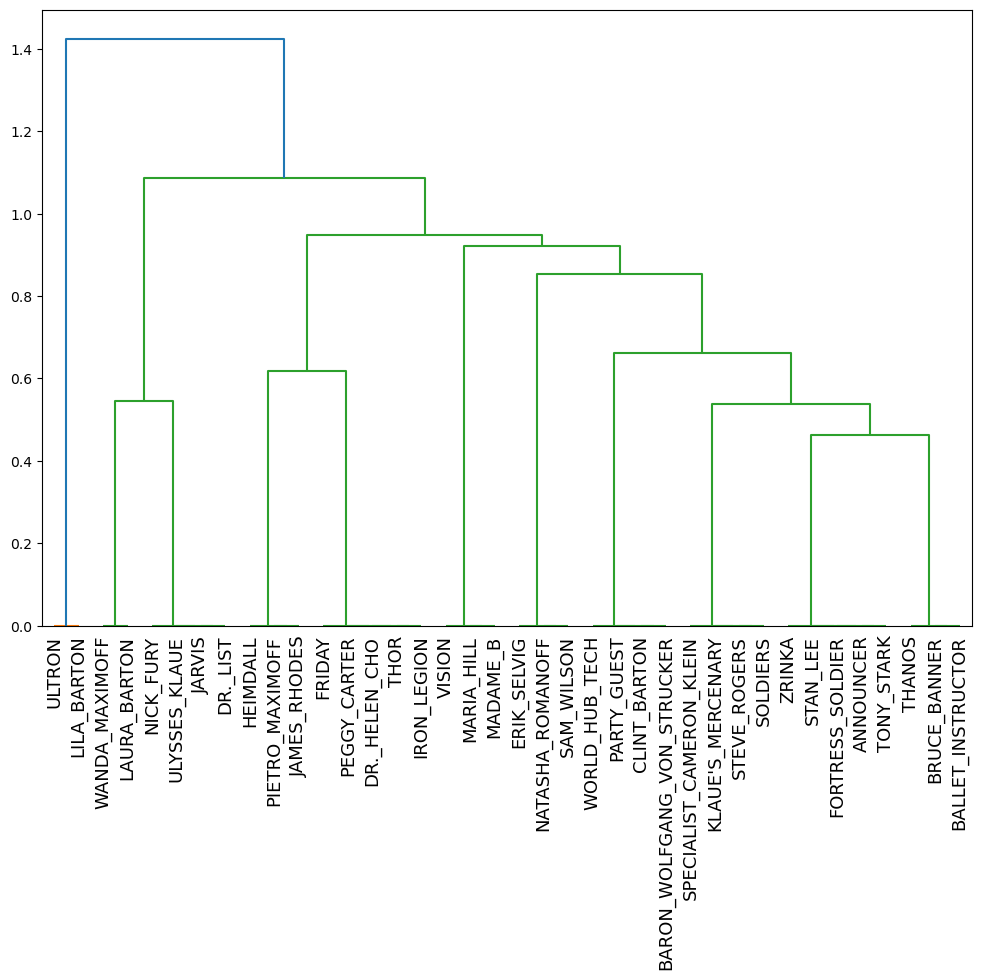

In [60]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

sd    = distance.squareform(np.log(1+interactions_characters))
h     = hierarchy.average(sd)
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)

h2    = hierarchy.dendrogram(h,labels=character_list,color_threshold=1.1)
ax.tick_params(axis='x', rotation=90, labelsize=13)

# Sentiment analysis

## VADER

In [61]:
vader = script.copy()
vader

lineNum         character  \
0          1         ANNOUNCER   
1          2        TONY STARK   
2          3      STEVE ROGERS   
3          4            JARVIS   
4          5              THOR   
..       ...               ...   
955      956  NATASHA ROMANOFF   
956      957      STEVE ROGERS   
957      958  NATASHA ROMANOFF   
958      959      STEVE ROGERS   
959      960            THANOS   

                                                  line  \
0    Report to your stations immediately. This is n...   
1                                                Shit!   
2     Language! JARVIS, what's the view from upstairs?   
3    The central building is protected by some kind...   
4    Loki's scepter must be here. Strucker couldn't...   
..                                                 ...   
955                            We've got some hitters.   
956                  They're good. They're not a team.   
957                         Let's beat 'em into shape.   
958                                       Avengers...!   
959                           Fine, I'll do it myself.   

                                            clean_line  \
0    Report to your stations immediately This is no...   
1                                                 Shit   
2         Language JARVIS whats the view from upstairs   
3    The central building is protected by some kind...   
4    Lokis scepter must be here Strucker couldnt mo...   
..                                                 ...   
955                              Weve got some hitters   
956                      Theyre good Theyre not a team   
957                            Lets beat em into shape   
958                                           Avengers   
959                              Fine Ill do it myself   

                                            POS tagged  \
0    [(Report, n), (stations, n), (immediately, r),...   
1                                          [(Shit, n)]   
2    [(Language, n), (JARVIS, n), (whats, v), (view...   
3    [(central, a), (building, n), (protected, v), ...   
4    [(Lokis, n), (scepter, n), (must, None), (Stru...   
..                                                 ...   
955                [(Weve, n), (got, v), (hitters, n)]   
956   [(Theyre, n), (good, a), (Theyre, n), (team, n)]   
957        [(Lets, n), (beat, v), (em, a), (shape, n)]   
958                                    [(Avengers, n)]   
959                              [(Fine, n), (Ill, n)]   

                                                 Lemma  
0       Report station immediately drill attack attack  
1                                                 Shit  
2                  Language JARVIS whats view upstairs  
3      central building protect kind energy shield ...  
4      Lokis scepter must Strucker couldnt mount de...  
..                                                 ...  
955                                    Weve get hitter  
956                            Theyre good Theyre team  
957                                 Lets beat em shape  
958                                           Avengers  
959                                           Fine Ill  

[960 rows x 6 columns]

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

vader['VaderSentiment'] = vader['Lemma'].apply(vadersentimentanalysis)
    
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

vader['Vader Analysis'] = vader['VaderSentiment'].apply(vader_analysis)
vader.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  VaderSentiment  \
0     Report station immediately drill attack attack         -0.7351   
1                                               Shit         -0.5574   
2                Language JARVIS whats view upstairs          0.0000   
3    central building protect kind energy shield ...          0.8481   
4    Lokis scepter must Strucker couldnt mount de...         -0.0951   

  Vader Analysis  
0       Negative  
1       Negative  
2        Neutral  
3       Positive  
4        Neutral

In [63]:
# Rolling average for smoothing 
vader['smooVader'] = vader['VaderSentiment'].rolling(5, min_periods=1).mean()
vader.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  VaderSentiment  \
0     Report station immediately drill attack attack         -0.7351   
1                                               Shit         -0.5574   
2                Language JARVIS whats view upstairs          0.0000   
3    central building protect kind energy shield ...          0.8481   
4    Lokis scepter must Strucker couldnt mount de...         -0.0951   

  Vader Analysis  smooVader  
0       Negative  -0.735100  
1       Negative  -0.646250  
2        Neutral  -0.430833  
3       Positive  -0.111100  
4        Neutral  -0.107900

In [64]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooVader'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
vader = apply_filter(vader)

Before applying noise-filter 
           lineNum  VaderSentiment   smooVader
count  960.000000      960.000000  960.000000
mean   480.500000        0.043589    0.042487
std    277.272429        0.340365    0.157875
min      1.000000       -0.906200   -0.735100
25%    240.750000        0.000000   -0.052720
50%    480.500000        0.000000    0.049900
75%    720.250000        0.273200    0.151590
max    960.000000        0.945800    0.477640
After applying noise-filter 
           lineNum  VaderSentiment   smooVader  noise_removed
count  960.000000      960.000000  960.000000     960.000000
mean   480.500000        0.043589    0.042487       0.048770
std    277.272429        0.340365    0.157875       0.100912
min      1.000000       -0.906200   -0.735100      -0.200680
25%    240.750000        0.000000   -0.052720      -0.018740
50%    480.500000        0.000000    0.049900       0.038690
75%    720.250000        0.273200    0.151590       0.114340
max    960.000000        0.945800    

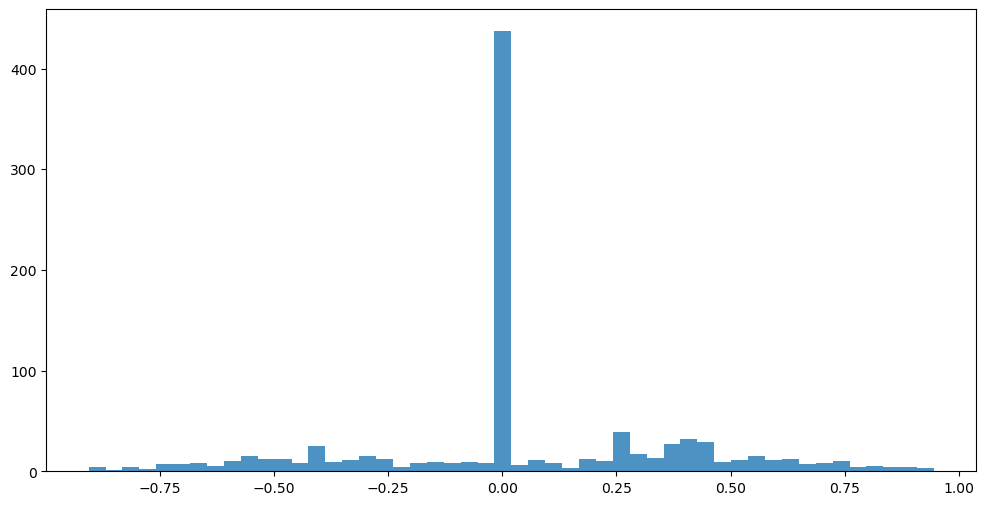

In [65]:
# Plot histogram
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(vader['VaderSentiment'], bins=50, alpha=0.8)
plt.show()

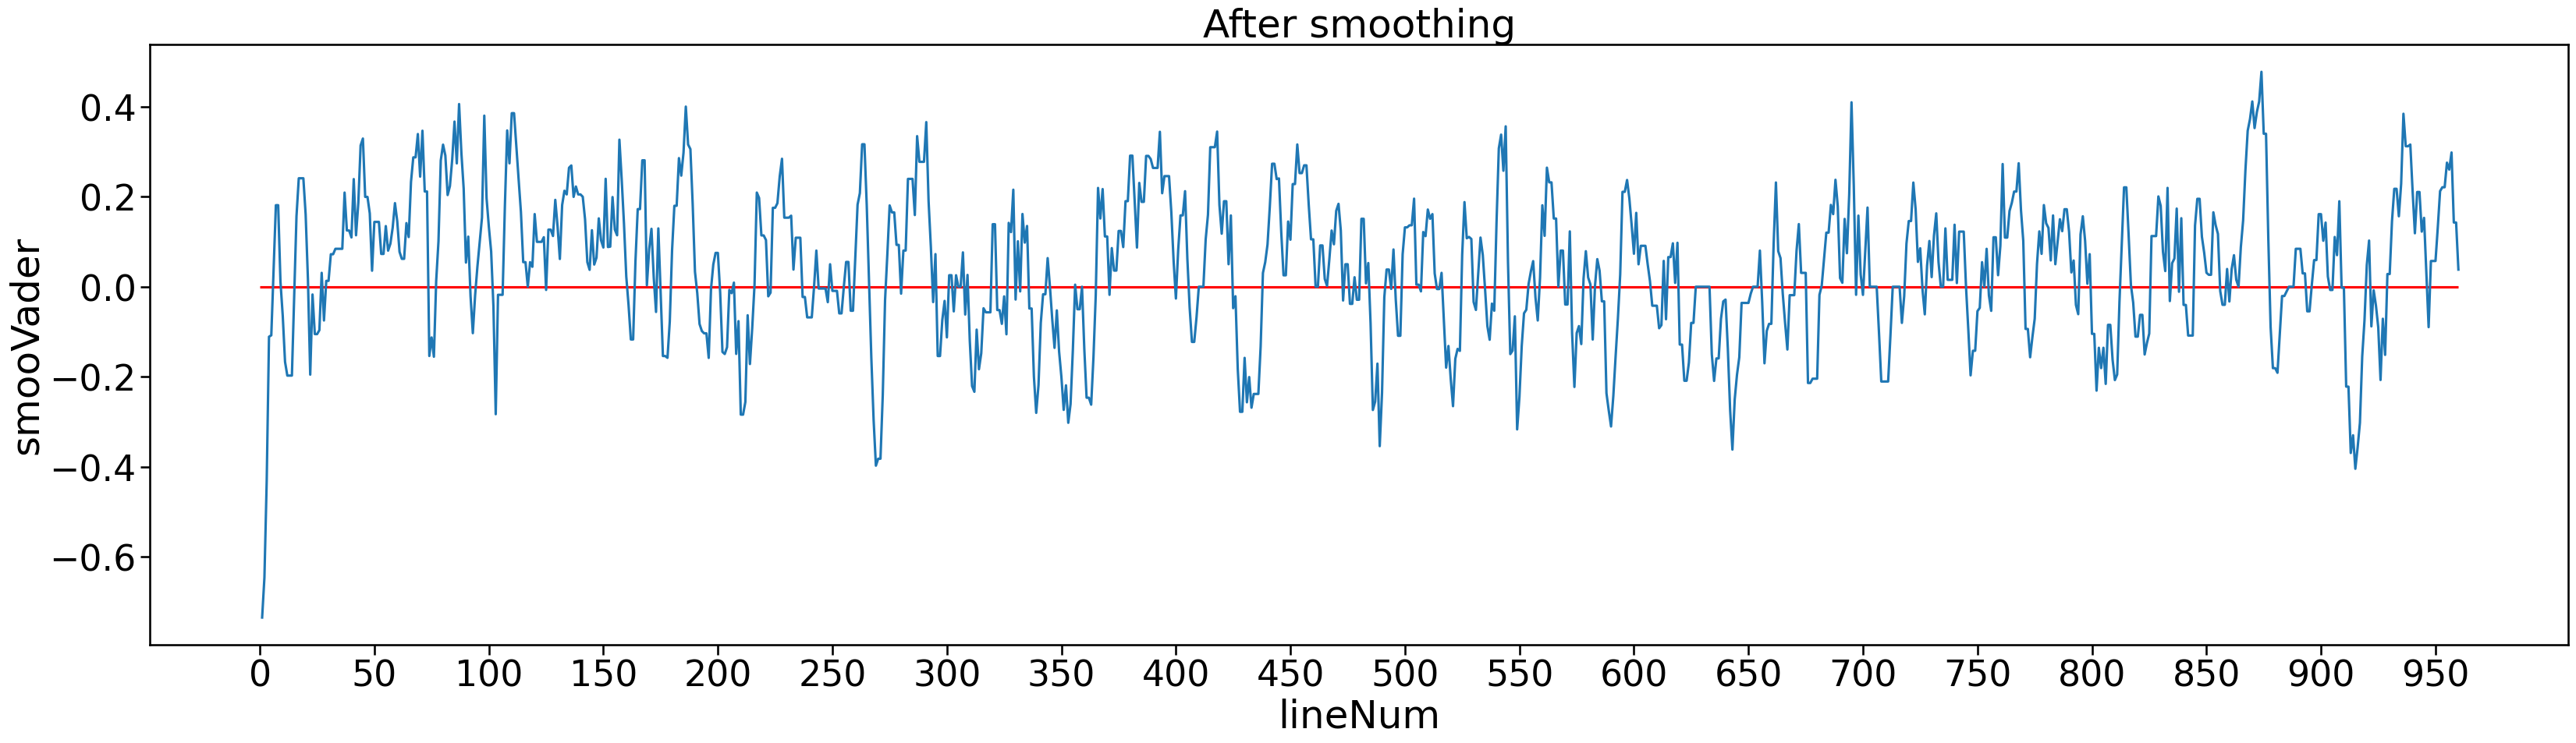

In [66]:
# plt.plot(fin_df['lineNum'], fin_df['VadarSentiment'])

import seaborn as sns

plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='smooVader', data=vader)
plt.title('After smoothing')
plt.xticks(np.arange(0, 1000, 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

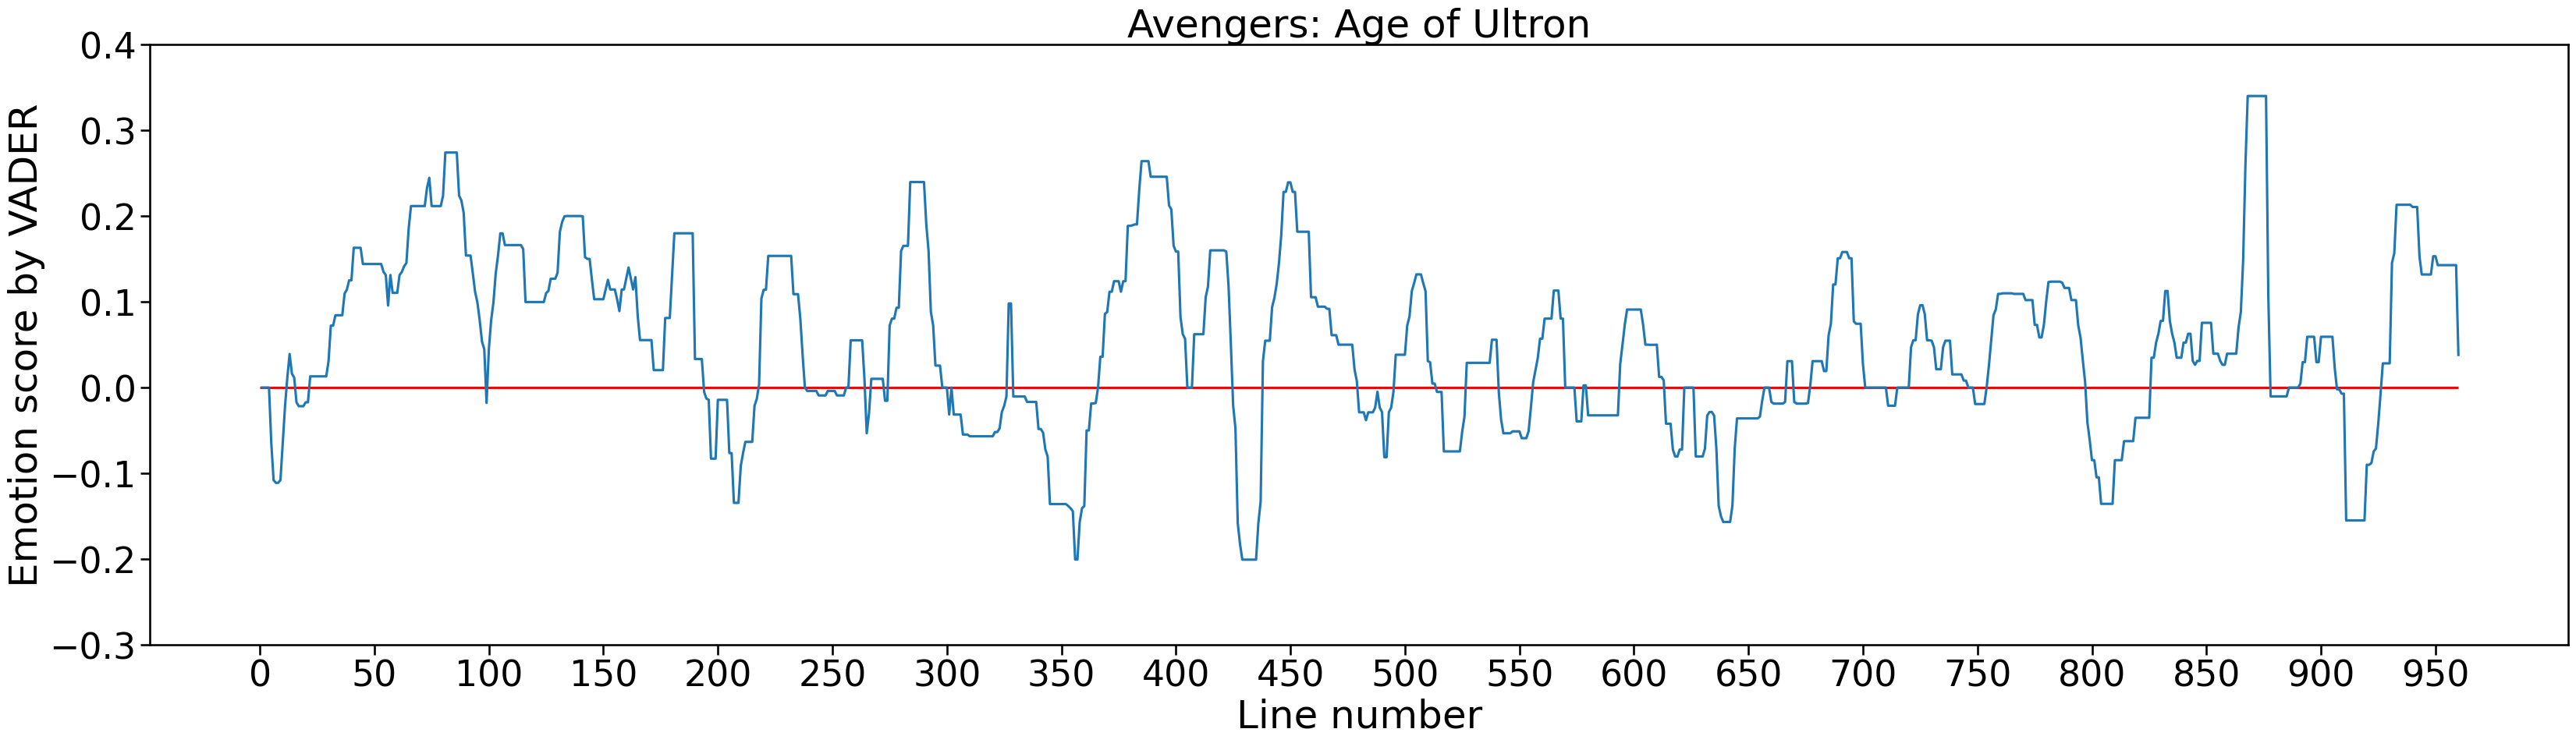

In [67]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('Avengers: Age of Ultron')
plt.xlabel('Line number')
plt.ylabel('Emotion score by VADER')
plt.ylim([-0.3, 0.4])
plt.xticks(np.arange(0, vader.lineNum.max(), 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

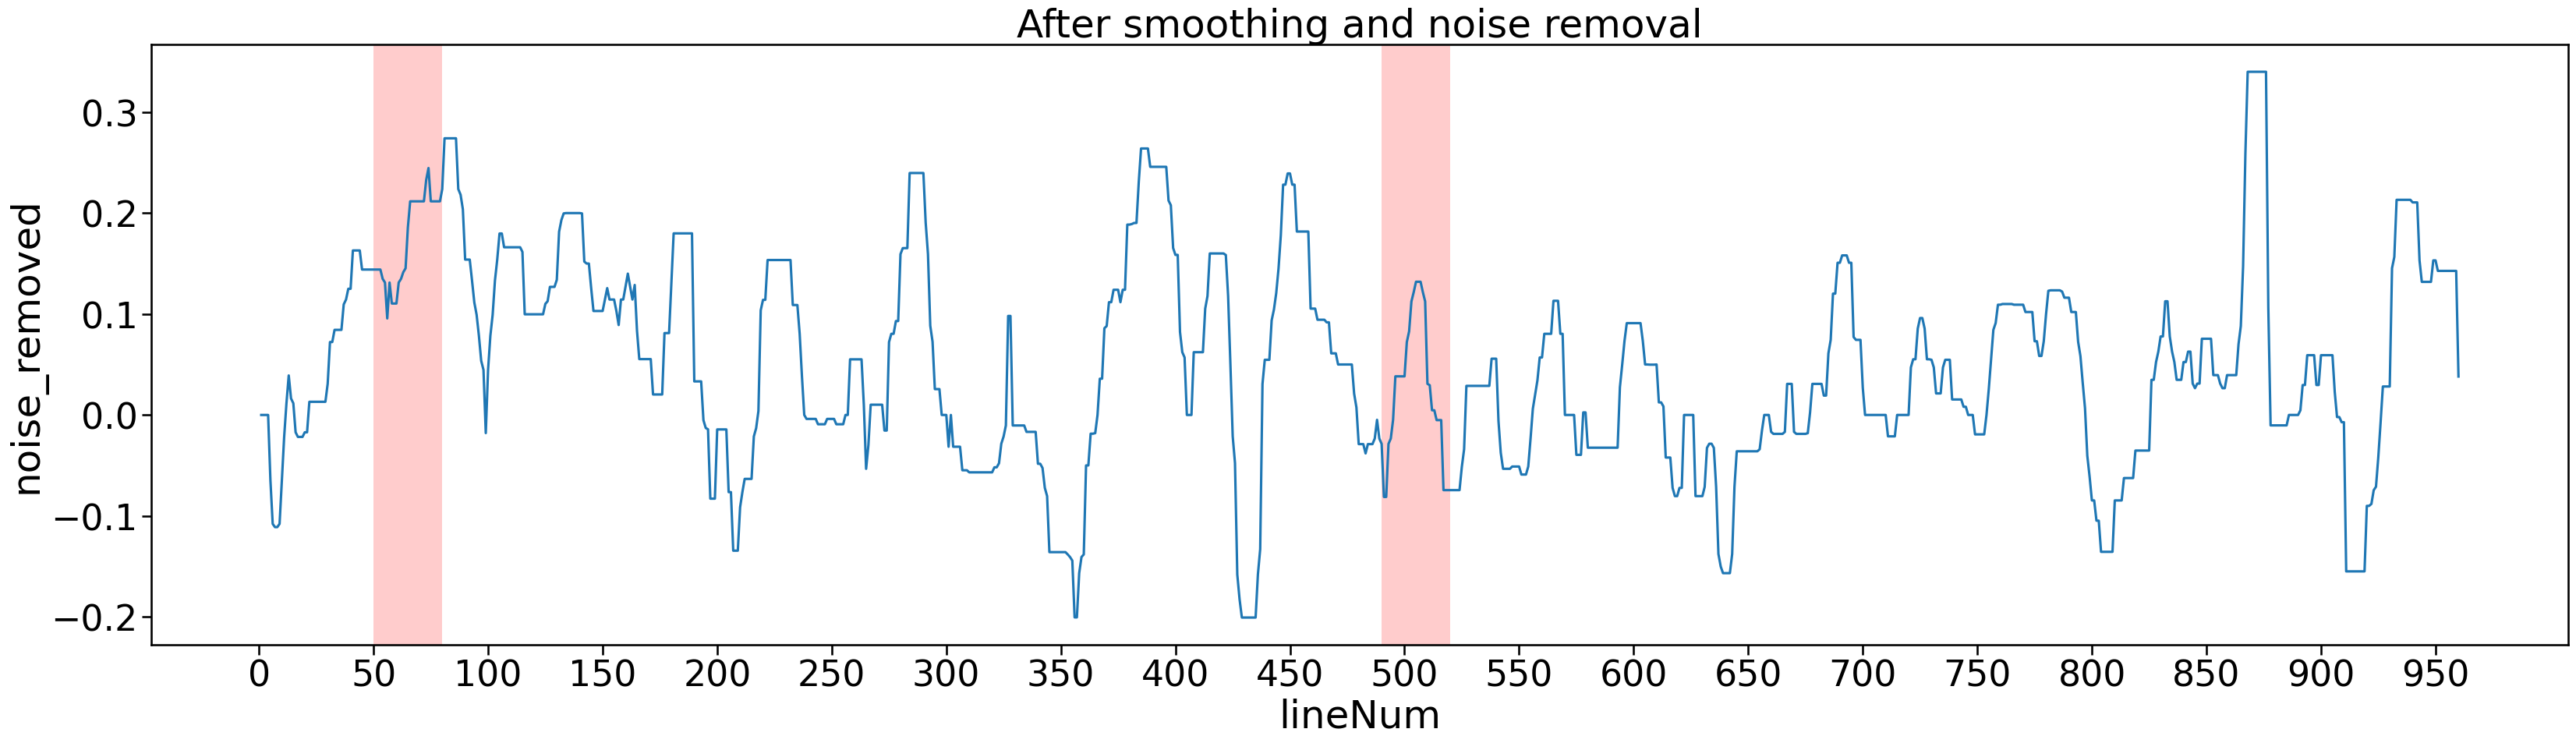

In [68]:
# Plot 
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
plot = sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('After smoothing and noise removal')
plt.xticks(np.arange(0, 1000, 50))

plot.axvspan(490, 520, facecolor='red', alpha=.2)
plot.axvspan(50, 80, facecolor='red', alpha=.2)
plt.show()

## Test Blob

In [69]:
blob = script.copy()
blob

lineNum         character  \
0          1         ANNOUNCER   
1          2        TONY STARK   
2          3      STEVE ROGERS   
3          4            JARVIS   
4          5              THOR   
..       ...               ...   
955      956  NATASHA ROMANOFF   
956      957      STEVE ROGERS   
957      958  NATASHA ROMANOFF   
958      959      STEVE ROGERS   
959      960            THANOS   

                                                  line  \
0    Report to your stations immediately. This is n...   
1                                                Shit!   
2     Language! JARVIS, what's the view from upstairs?   
3    The central building is protected by some kind...   
4    Loki's scepter must be here. Strucker couldn't...   
..                                                 ...   
955                            We've got some hitters.   
956                  They're good. They're not a team.   
957                         Let's beat 'em into shape.   
958                                       Avengers...!   
959                           Fine, I'll do it myself.   

                                            clean_line  \
0    Report to your stations immediately This is no...   
1                                                 Shit   
2         Language JARVIS whats the view from upstairs   
3    The central building is protected by some kind...   
4    Lokis scepter must be here Strucker couldnt mo...   
..                                                 ...   
955                              Weve got some hitters   
956                      Theyre good Theyre not a team   
957                            Lets beat em into shape   
958                                           Avengers   
959                              Fine Ill do it myself   

                                            POS tagged  \
0    [(Report, n), (stations, n), (immediately, r),...   
1                                          [(Shit, n)]   
2    [(Language, n), (JARVIS, n), (whats, v), (view...   
3    [(central, a), (building, n), (protected, v), ...   
4    [(Lokis, n), (scepter, n), (must, None), (Stru...   
..                                                 ...   
955                [(Weve, n), (got, v), (hitters, n)]   
956   [(Theyre, n), (good, a), (Theyre, n), (team, n)]   
957        [(Lets, n), (beat, v), (em, a), (shape, n)]   
958                                    [(Avengers, n)]   
959                              [(Fine, n), (Ill, n)]   

                                                 Lemma  
0       Report station immediately drill attack attack  
1                                                 Shit  
2                  Language JARVIS whats view upstairs  
3      central building protect kind energy shield ...  
4      Lokis scepter must Strucker couldnt mount de...  
..                                                 ...  
955                                    Weve get hitter  
956                            Theyre good Theyre team  
957                                 Lets beat em shape  
958                                           Avengers  
959                                           Fine Ill  

[960 rows x 6 columns]

In [70]:
# TestBlob
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

blob['Subjectivity'] = blob['Lemma'].apply(getSubjectivity) 
blob['Polarity'] = blob['Lemma'].apply(getPolarity) 
blob['Analysis'] = blob['Polarity'].apply(analysis)
blob.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  Subjectivity  Polarity  \
0     Report station immediately drill attack attack      0.000000  0.000000   
1                                               Shit      0.800000 -0.200000   
2                Language JARVIS whats view upstairs      0.000000  0.000000   
3    central building protect kind energy shield ...      0.716667 -0.066667   
4    Lokis scepter must Strucker couldnt mount de...      0.233333 -0.025000   

   Analysis  
0   Neutral  
1  Negative  
2   Neutral  
3  Negative  
4  Negative

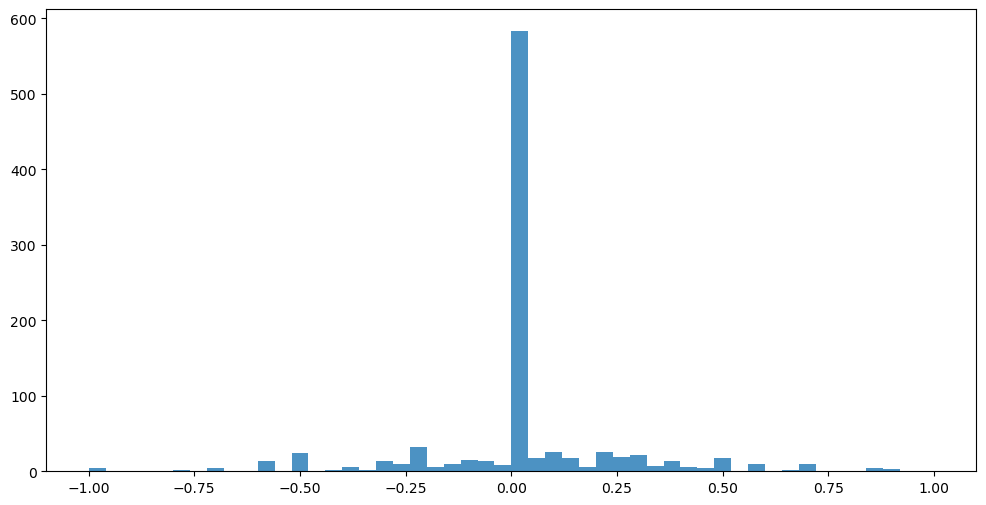

In [71]:
# Plot histogram
plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(blob['Polarity'], bins=50, alpha=0.8)
plt.show()

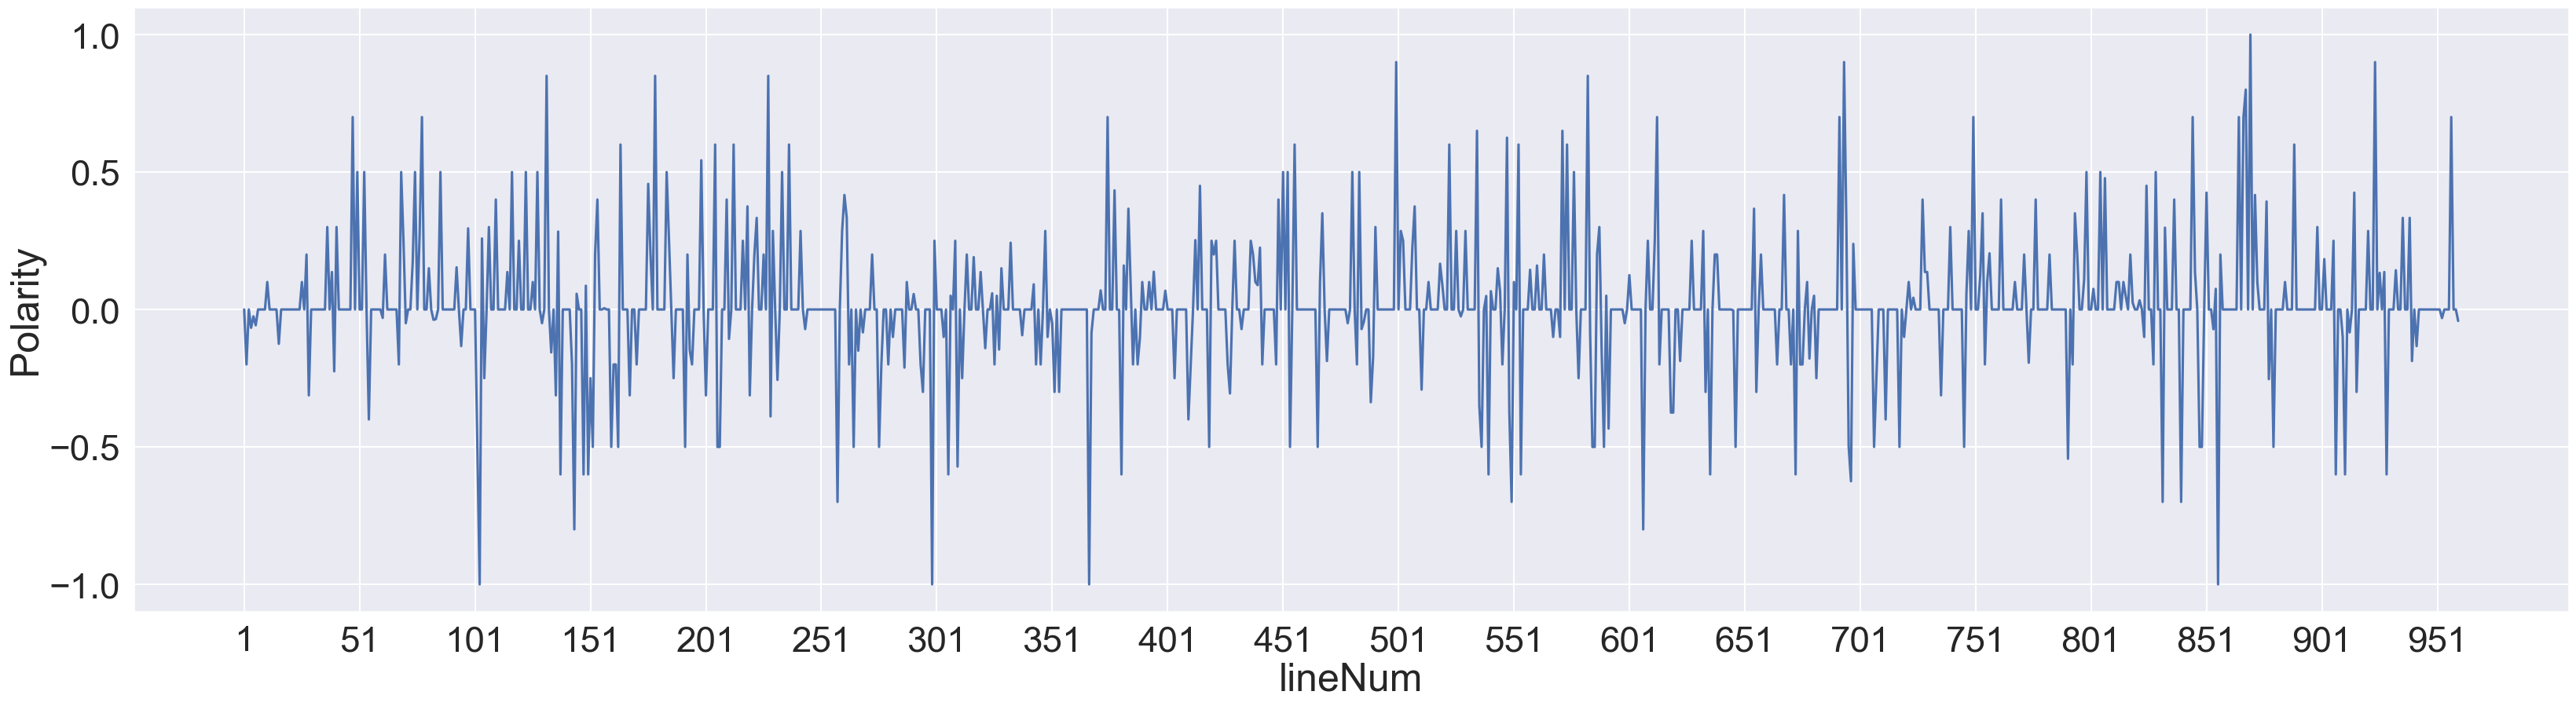

In [72]:
plt.figure(figsize=(40, 10))
sns.set()
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='Polarity', data=blob)
plt.xticks(np.arange(blob.lineNum.min(), blob.lineNum.max(), 50))
plt.show()

In [73]:
# Rolling average for smoothing
blob['smooPolarity'] = blob['Polarity'].rolling(5, min_periods=1).mean()
blob['smooSubjectivity'] = blob['Subjectivity'].rolling(5, min_periods=1).mean()
blob.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  Subjectivity  Polarity  \
0     Report station immediately drill attack attack      0.000000  0.000000   
1                                               Shit      0.800000 -0.200000   
2                Language JARVIS whats view upstairs      0.000000  0.000000   
3    central building protect kind energy shield ...      0.716667 -0.066667   
4    Lokis scepter must Strucker couldnt mount de...      0.233333 -0.025000   

   Analysis  smooPolarity  smooSubjectivity  
0   Neutral      0.000000          0.000000  
1  Negative     -0.100000          0.400000  
2   Neutral     -0.066667          0.266667  
3  Negative     -0.066667          0.379167  
4  Negative     -0.058333          0.350000

In [74]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooPolarity'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
blob = apply_filter(blob)

Before applying noise-filter 
           lineNum  Subjectivity    Polarity  smooPolarity  smooSubjectivity
count  960.000000    960.000000  960.000000    960.000000        960.000000
mean   480.500000      0.237809    0.016290      0.016074          0.237499
std    277.272429      0.323214    0.238103      0.107658          0.149580
min      1.000000      0.000000   -1.000000     -0.372738          0.000000
25%    240.750000      0.000000    0.000000     -0.046845          0.132500
50%    480.500000      0.000000    0.000000      0.010417          0.220000
75%    720.250000      0.500000    0.000000      0.076706          0.314143
max    960.000000      1.000000    1.000000      0.500000          0.777262
After applying noise-filter 
           lineNum  Subjectivity    Polarity  smooPolarity  smooSubjectivity  \
count  960.000000    960.000000  960.000000    960.000000        960.000000   
mean   480.500000      0.237809    0.016290      0.016074          0.237499   
std    277.272429 

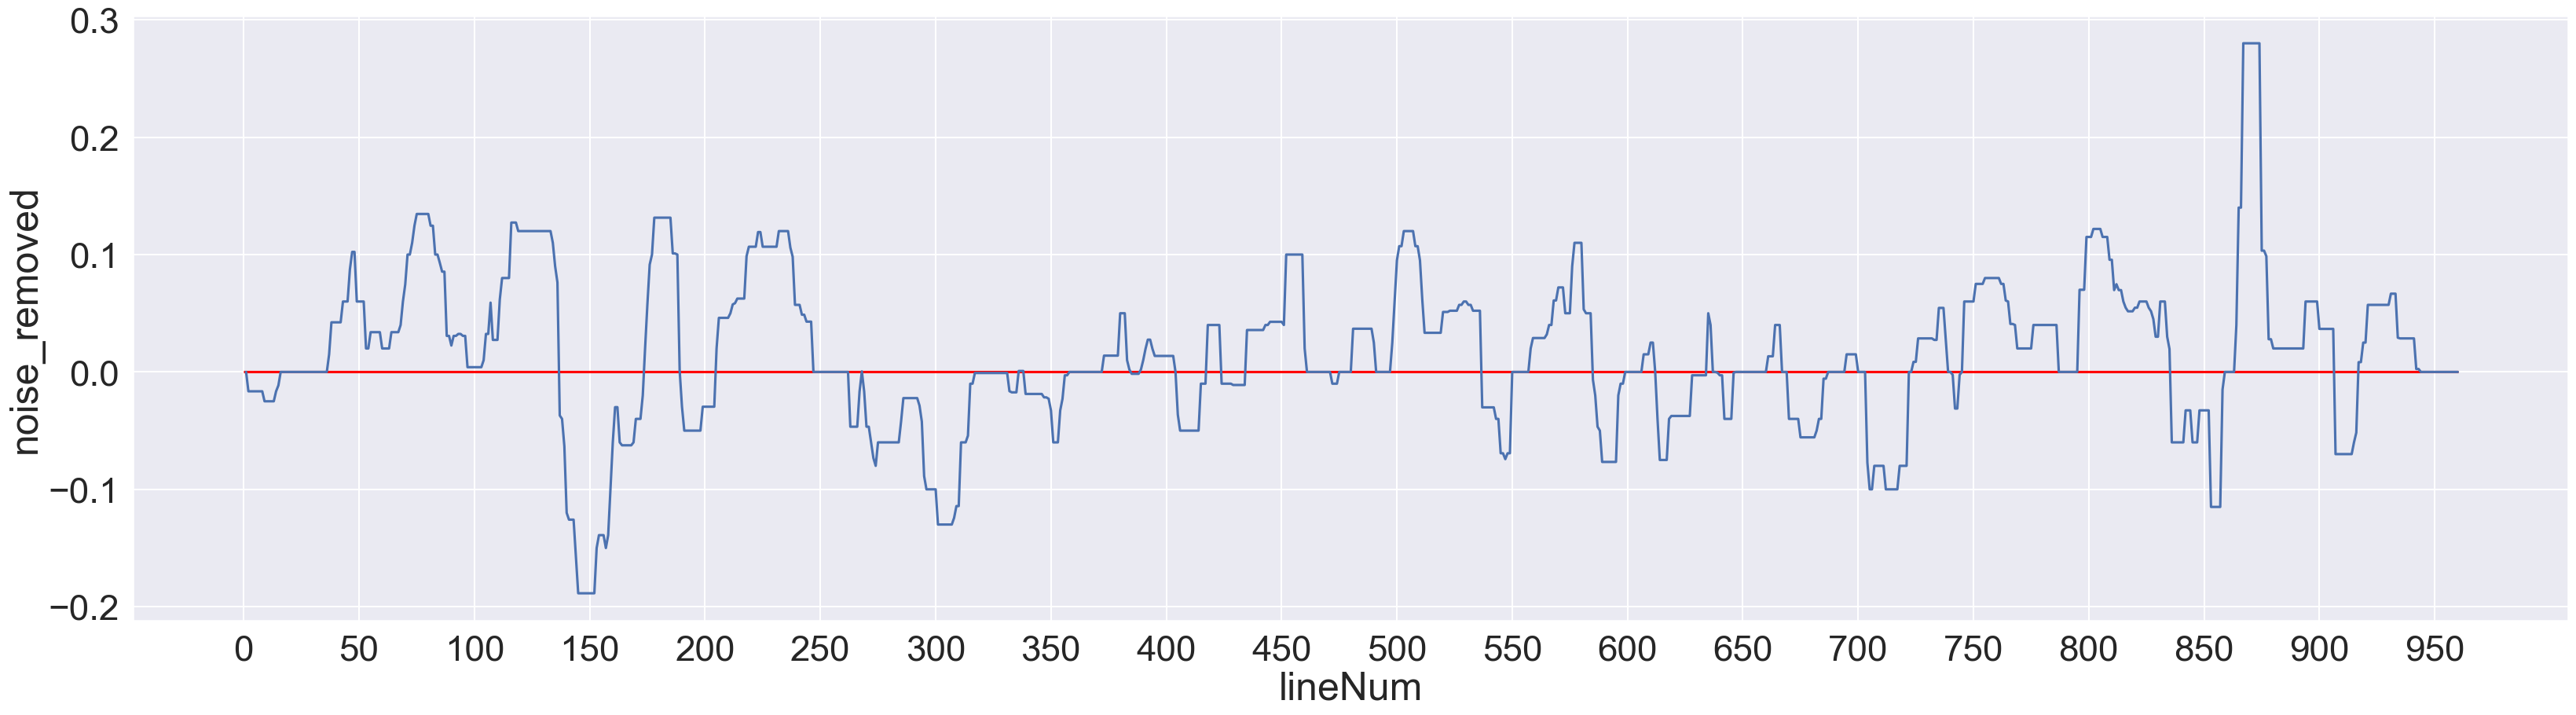

In [75]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=blob)
plt.hlines(0, 0, blob.lineNum.max(), color='red')
plt.xticks(np.arange(0, 1000, 50))
plt.show()

# NRCLex


## Line by line

In [76]:
from nrclex import NRCLex

In [77]:
nrc = script.copy()
nrc.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  
0     Report station immediately drill attack attack  
1                                               Shit  
2                Language JARVIS whats view upstairs  
3    central building protect kind energy shield ...  
4    Lokis scepter must Strucker couldnt mount de...

In [78]:
# Change the line to text_object for NRCLex
def totextobject(line):
    text_object = NRCLex(line)
    return text_object
nrc['text_object'] = nrc['Lemma'].apply(totextobject)
nrc.head(5)

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  \
0     Report station immediately drill attack attack   
1                                               Shit   
2                Language JARVIS whats view upstairs   
3    central building protect kind energy shield ...   
4    Lokis scepter must Strucker couldnt mount de...   

                                text_object  
0  <nrclex.NRCLex object at 0x7fb5d8e70f10>  
1  <nrclex.NRCLex object at 0x7fb5d8e70040>  
2  <nrclex.NRCLex object at 0x7fb5d8e70ee0>  
3  <nrclex.NRCLex object at 0x7fb5d8e70fa0>  
4  <nrclex.NRCLex object at 0x7fb5d8e74070>

In [79]:
# NRCLex analysis for each line
for i, row in nrc.iterrows():
    freq = nrc.loc[i, 'text_object'].affect_frequencies
    for key in freq.keys():
        nrc.at[i, key] = freq[key]
        
nrc.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  \
0     Report station immediately drill attack attack   
1                                               Shit   
2                Language JARVIS whats view upstairs   
3    central building protect kind energy shield ...   
4    Lokis scepter must Strucker couldnt mount de...   

                                text_object      fear     anger  anticip  \
0  <nrclex.NRCLex object at 0x7fb5d8e70f10>  0.222222  0.222222      0.0   
1  <nrclex.NRCLex object at 0x7fb5d8e70040>  0.000000  0.000000      0.0   
2  <nrclex.NRCLex object at 0x7fb5d8e70ee0>  0.000000  0.000000      0.0   
3  <nrclex.NRCLex object at 0x7fb5d8e70fa0>  0.000000  0.000000      0.0   
4  <nrclex.NRCLex object at 0x7fb5d8e74070>  0.200000  0.200000      0.0   

      trust  surprise  positive  negative  sadness  disgust       joy  \
0  0.000000       0.0  0.111111  0.333333      0.0      0.0  0.000000   
1  0.000000       0.0  0.000000  0.000000      0.0      0.0  0.000000   
2  0.000000       0.0  0.000000  0.000000      0.0      0.0  0.000000   
3  0.285714       0.0  0.571429  0.000000      0.0      0.0  0.142857   
4  0.000000       0.0  0.200000  0.000000      0.0      0.0  0.000000   

   anticipation  
0      0.111111  
1           NaN  
2           NaN  
3           NaN  
4      0.400000

In [80]:
nrc = nrc.drop('anticip', axis=1)

In [81]:
def smoothing(column):
    smoothed = column.rolling(5, min_periods=1).mean()
    return smoothed

nrc['smooFear'] = smoothing(nrc['fear'])
nrc['smooAnger'] = smoothing(nrc['anger'])
nrc['smooTrust'] = smoothing(nrc['trust'])
nrc['smooSurprise'] = smoothing(nrc['surprise'])
nrc['smooPositive'] = smoothing(nrc['positive'])
nrc['smooNegative'] = smoothing(nrc['negative'])
nrc['smooSadness'] = smoothing(nrc['sadness'])
nrc['smooDisgust'] = smoothing(nrc['disgust'])
nrc['smooJoy'] = smoothing(nrc['joy'])
nrc['smooAnticipation'] = smoothing(nrc['anticipation'])

nrc.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  \
0     Report station immediately drill attack attack   
1                                               Shit   
2                Language JARVIS whats view upstairs   
3    central building protect kind energy shield ...   
4    Lokis scepter must Strucker couldnt mount de...   

                                text_object      fear     anger     trust  \
0  <nrclex.NRCLex object at 0x7fb5d8e70f10>  0.222222  0.222222  0.000000   
1  <nrclex.NRCLex object at 0x7fb5d8e70040>  0.000000  0.000000  0.000000   
2  <nrclex.NRCLex object at 0x7fb5d8e70ee0>  0.000000  0.000000  0.000000   
3  <nrclex.NRCLex object at 0x7fb5d8e70fa0>  0.000000  0.000000  0.285714   
4  <nrclex.NRCLex object at 0x7fb5d8e74070>  0.200000  0.200000  0.000000   

   ...  smooFear  smooAnger  smooTrust  smooSurprise  smooPositive  \
0  ...  0.222222   0.222222   0.000000           0.0      0.111111   
1  ...  0.111111   0.111111   0.000000           0.0      0.055556   
2  ...  0.074074   0.074074   0.000000           0.0      0.037037   
3  ...  0.055556   0.055556   0.071429           0.0      0.170635   
4  ...  0.084444   0.084444   0.057143           0.0      0.176508   

   smooNegative  smooSadness  smooDisgust   smooJoy  smooAnticipation  
0      0.333333          0.0          0.0  0.000000          0.111111  
1      0.166667          0.0          0.0  0.000000          0.111111  
2      0.111111          0.0          0.0  0.000000          0.111111  
3      0.083333          0.0          0.0  0.035714          0.111111  
4      0.066667          0.0          0.0  0.028571          0.255556  

[5 rows x 27 columns]

In [82]:
# Noise filter
def apply_filter(column):   
    return sp.medfilt(column, 15)


for i in range(17,27):
    col_name = str(nrc.columns[i][4:])
    nrc.loc[:, col_name] = apply_filter(nrc.iloc[:,i])

nrc = nrc.fillna(0)
nrc.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  \
0     Report station immediately drill attack attack   
1                                               Shit   
2                Language JARVIS whats view upstairs   
3    central building protect kind energy shield ...   
4    Lokis scepter must Strucker couldnt mount de...   

                                text_object      fear     anger     trust  \
0  <nrclex.NRCLex object at 0x7fb5d8e70f10>  0.222222  0.222222  0.000000   
1  <nrclex.NRCLex object at 0x7fb5d8e70040>  0.000000  0.000000  0.000000   
2  <nrclex.NRCLex object at 0x7fb5d8e70ee0>  0.000000  0.000000  0.000000   
3  <nrclex.NRCLex object at 0x7fb5d8e70fa0>  0.000000  0.000000  0.285714   
4  <nrclex.NRCLex object at 0x7fb5d8e74070>  0.200000  0.200000  0.000000   

   ...      Fear     Anger     Trust  Surprise  Positive  Negative  Sadness  \
0  ...  0.040000  0.040000  0.000000       0.0  0.037037  0.050000      0.0   
1  ...  0.055556  0.055556  0.000000       0.0  0.055556  0.066667      0.0   
2  ...  0.074074  0.060000  0.000000       0.0  0.055556  0.070000      0.0   
3  ...  0.080000  0.060000  0.057143       0.0  0.093333  0.070000      0.0   
4  ...  0.080000  0.060000  0.057143       0.0  0.100000  0.083333      0.0   

   Disgust       Joy  Anticipation  
0      0.0  0.000000      0.111111  
1      0.0  0.000000      0.111111  
2      0.0  0.000000      0.111111  
3      0.0  0.028571      0.111111  
4      0.0  0.028571      0.166667  

[5 rows x 37 columns]

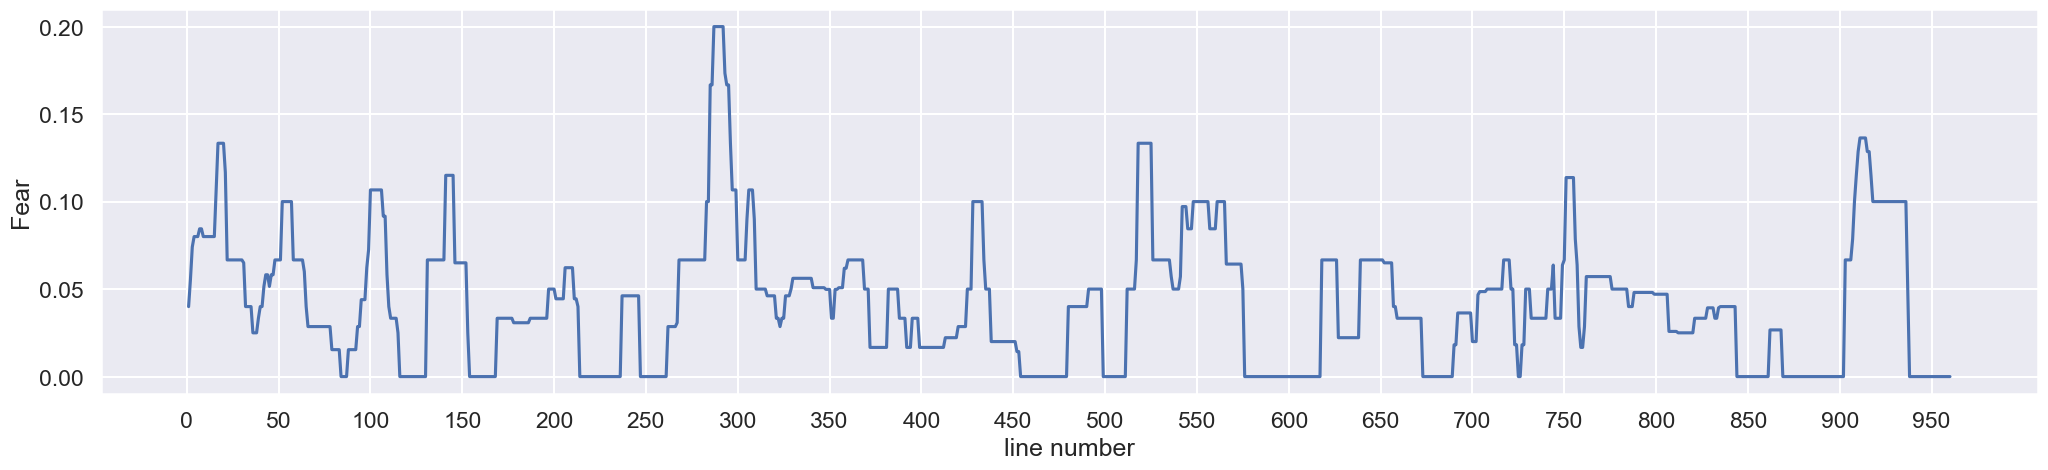

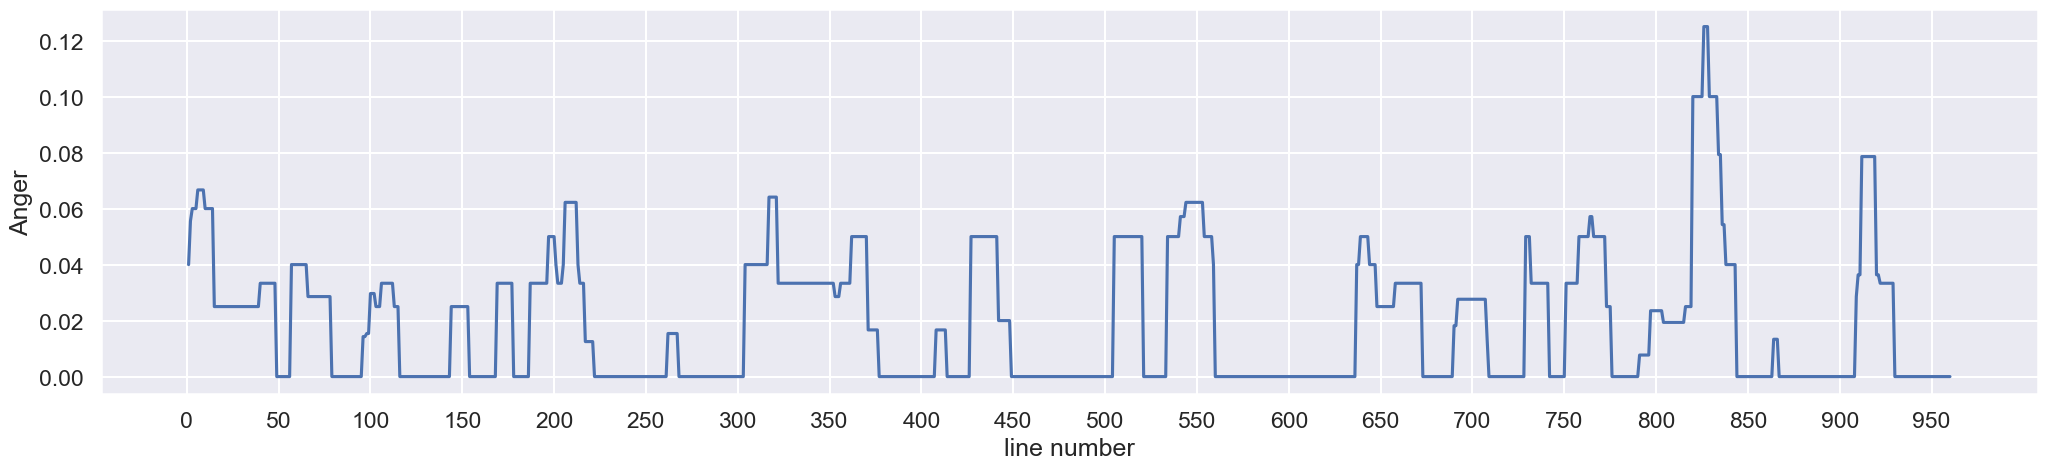

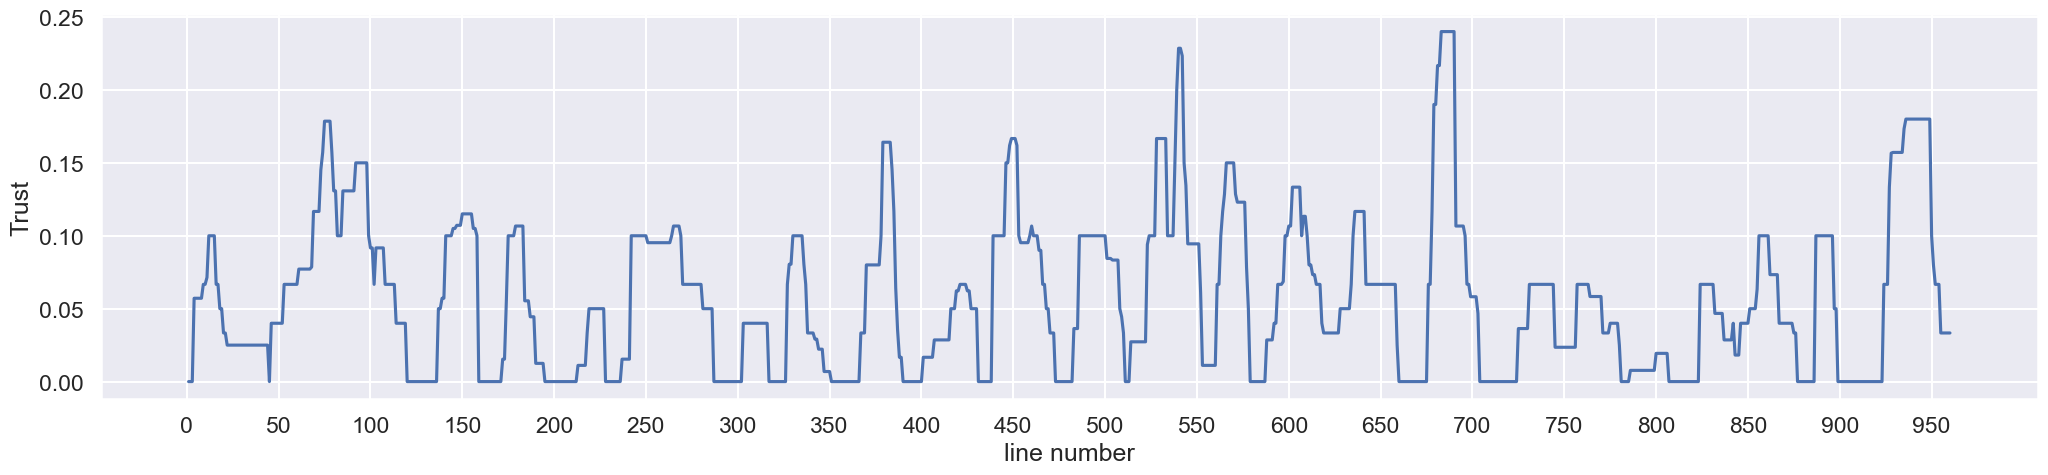

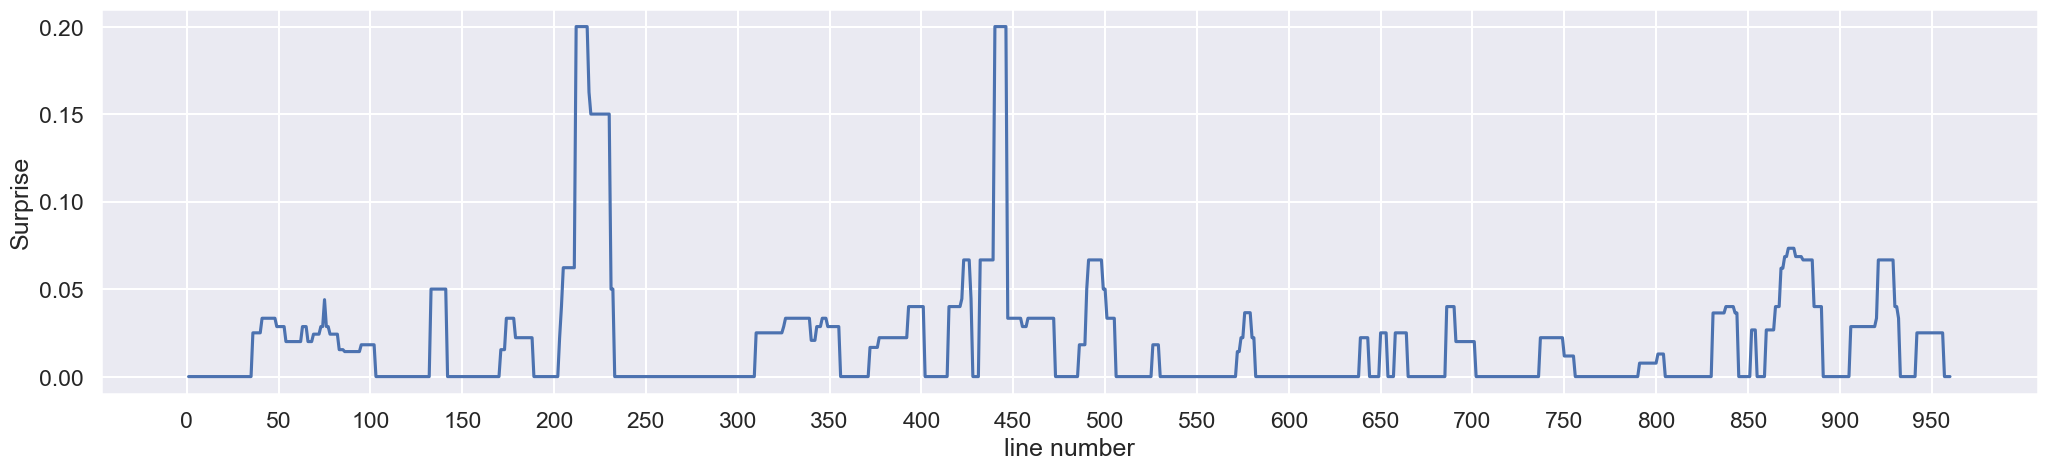

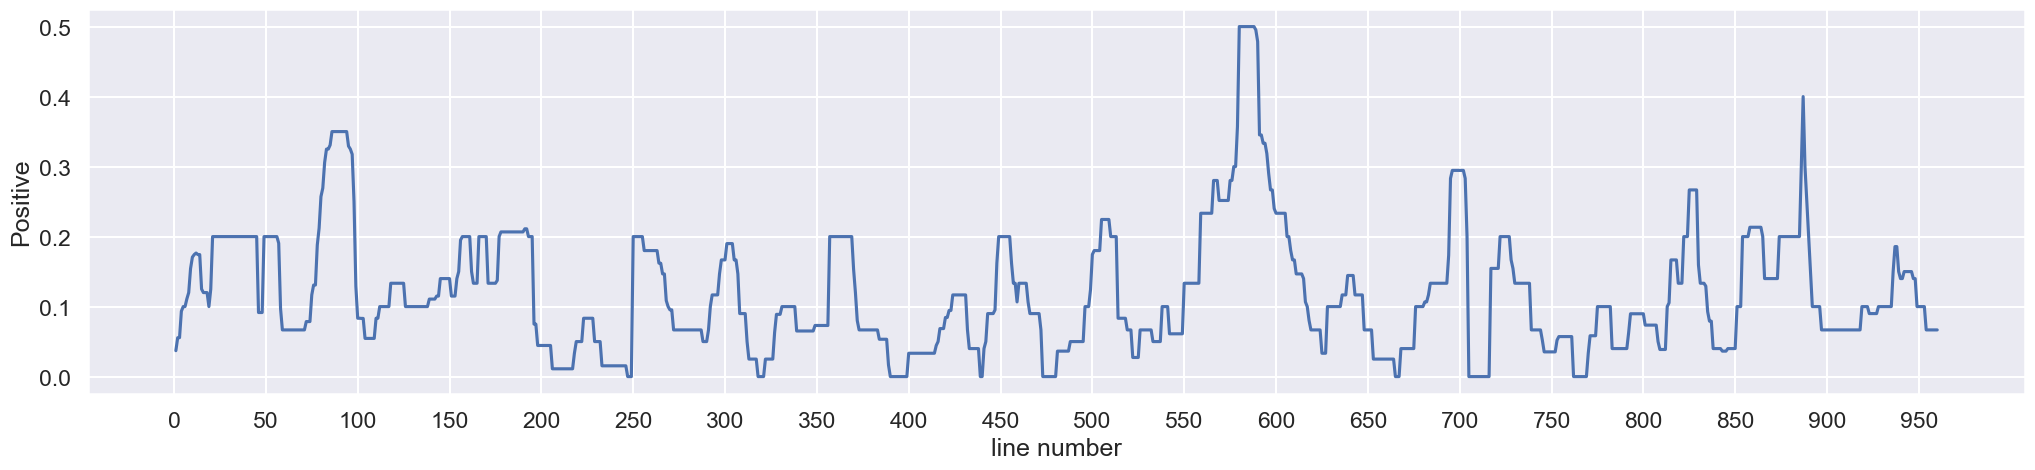

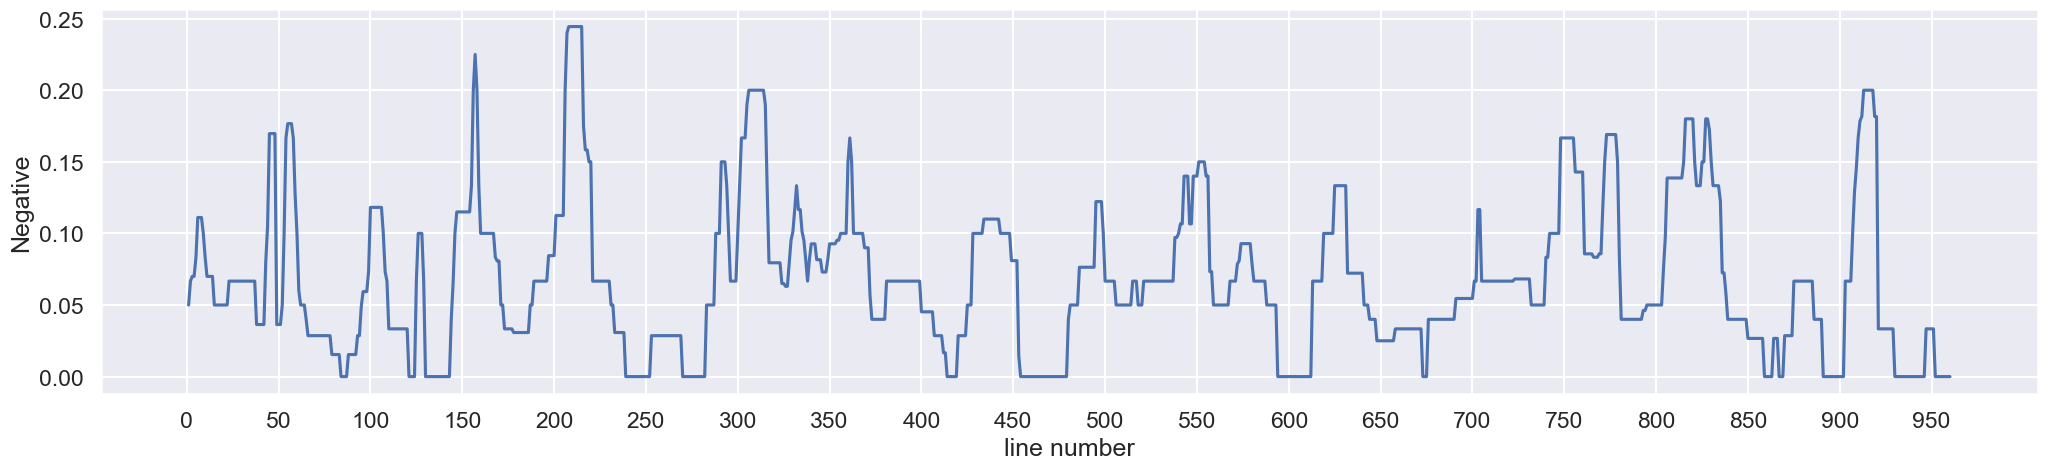

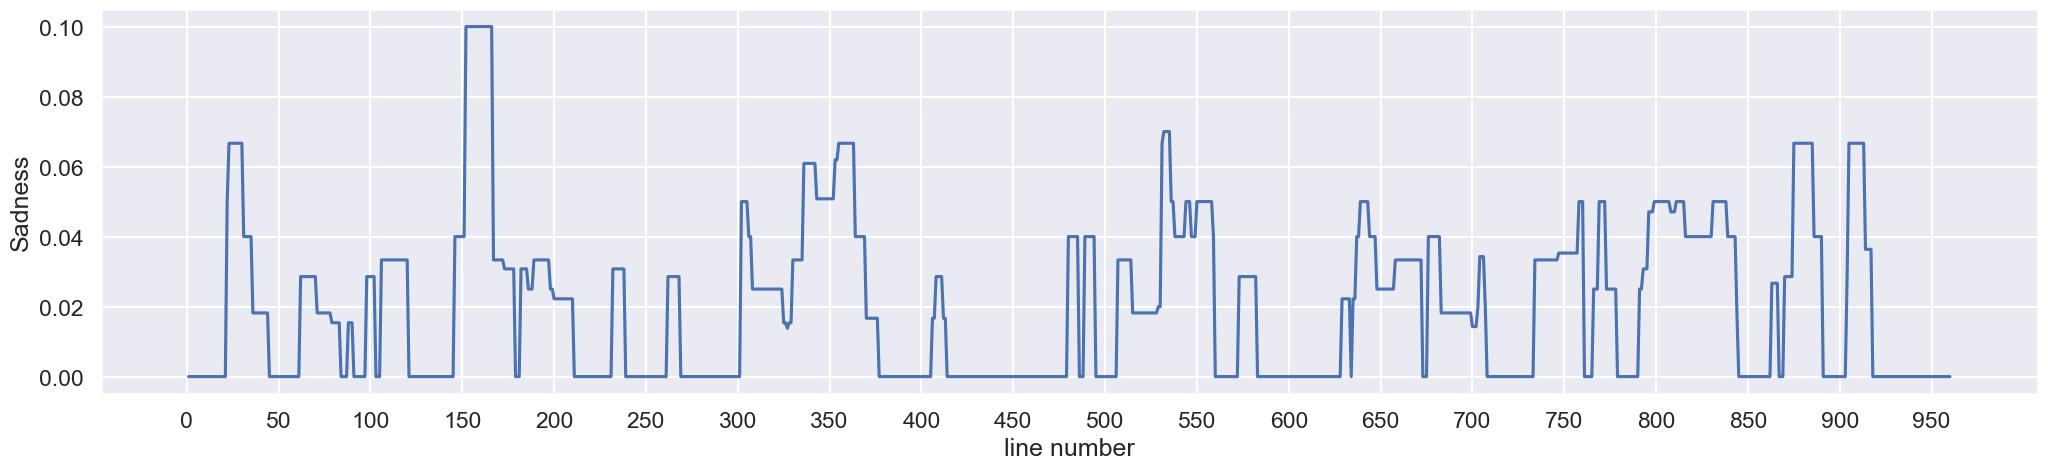

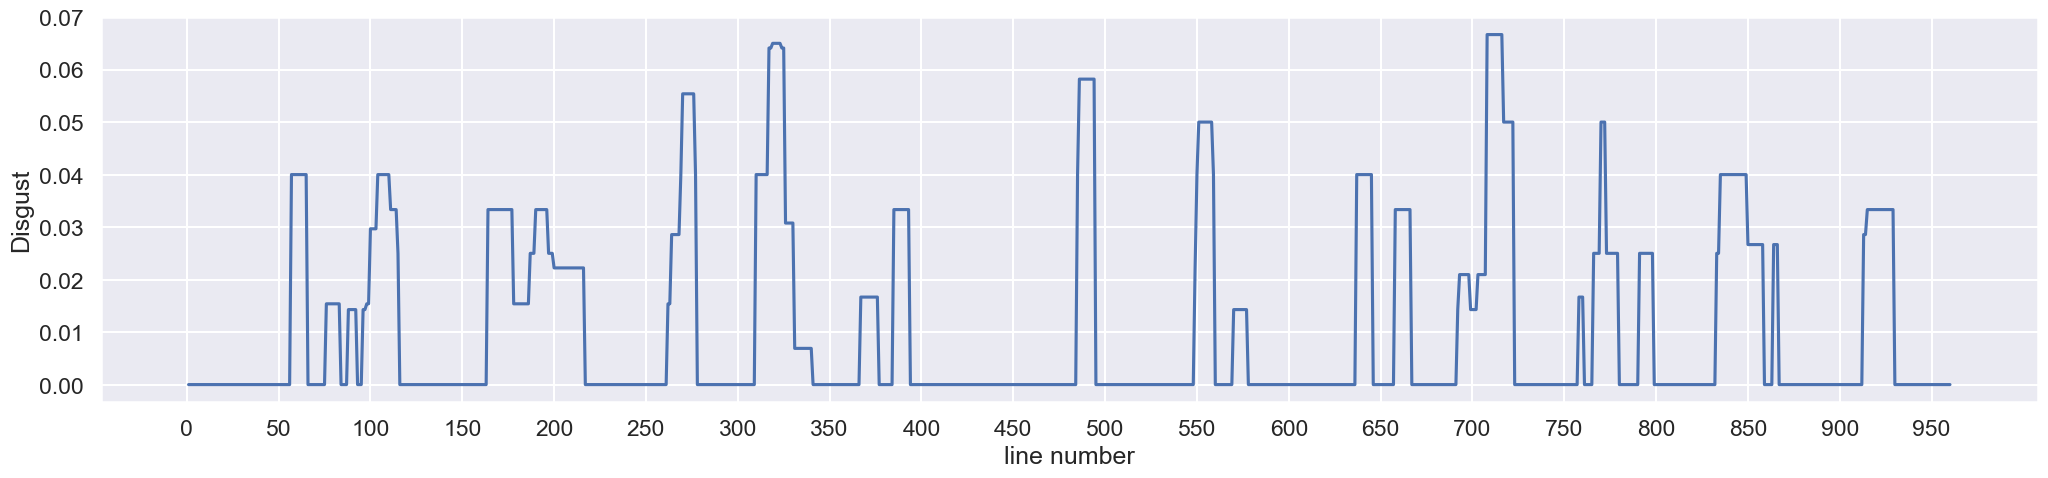

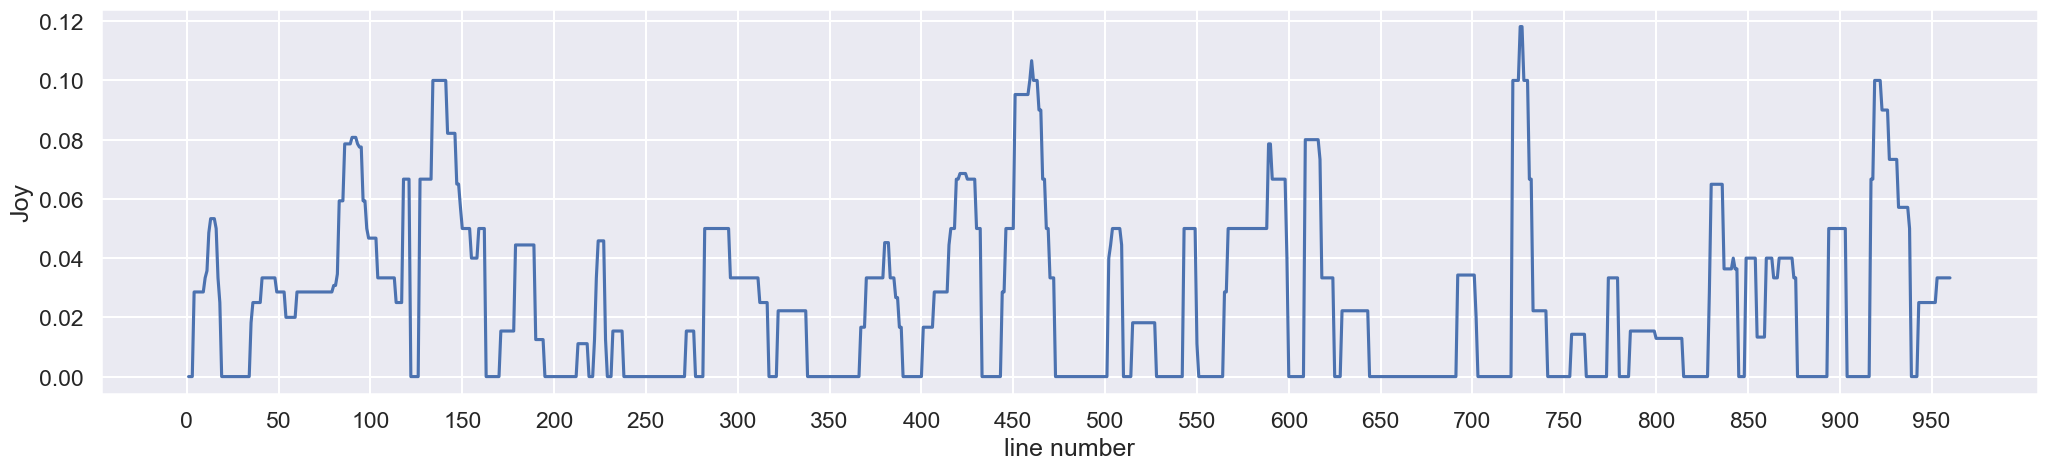

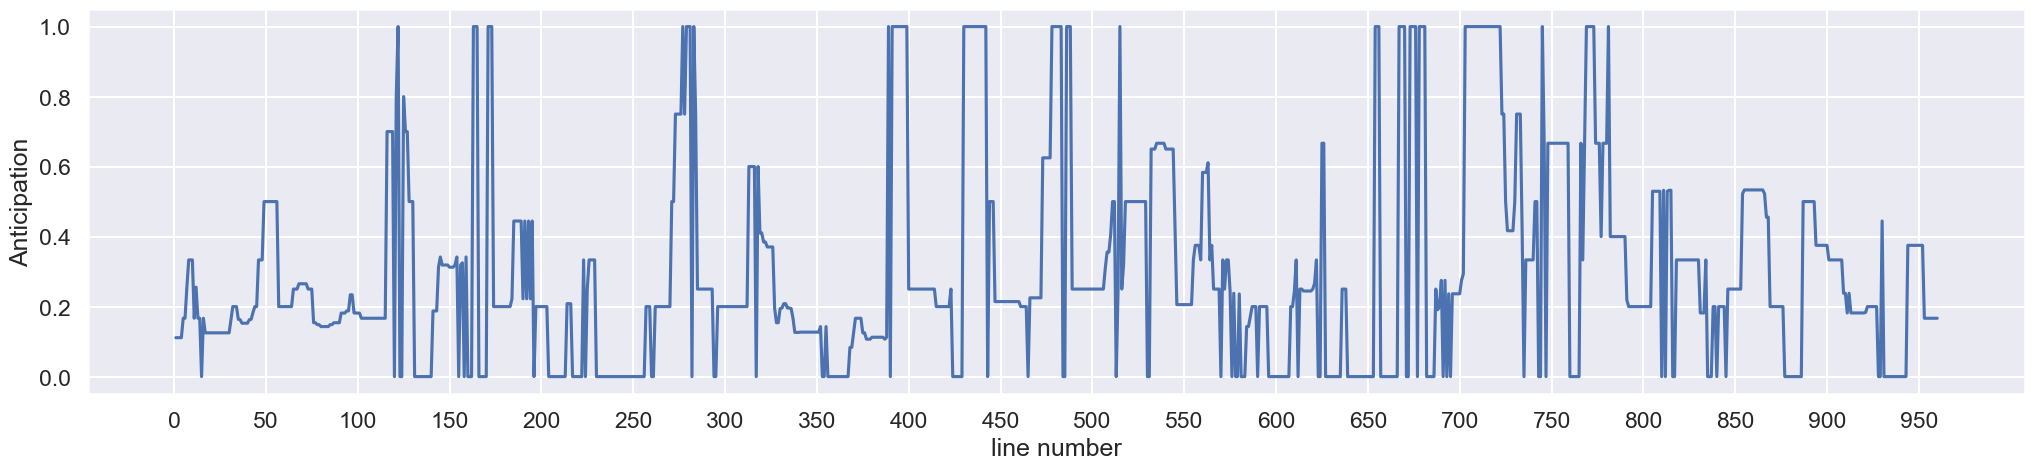

In [83]:
for i in range(27, 37):
    plt.figure(figsize=(25, 5))
    sns.set_context("talk", font_scale=1)
    plot = sns.lineplot(x = 'lineNum', y=nrc.columns[i], data=nrc)
    plt.xticks(np.arange(0, 1000, 50))
    plot.set_xlabel('line number')
    plt.show()

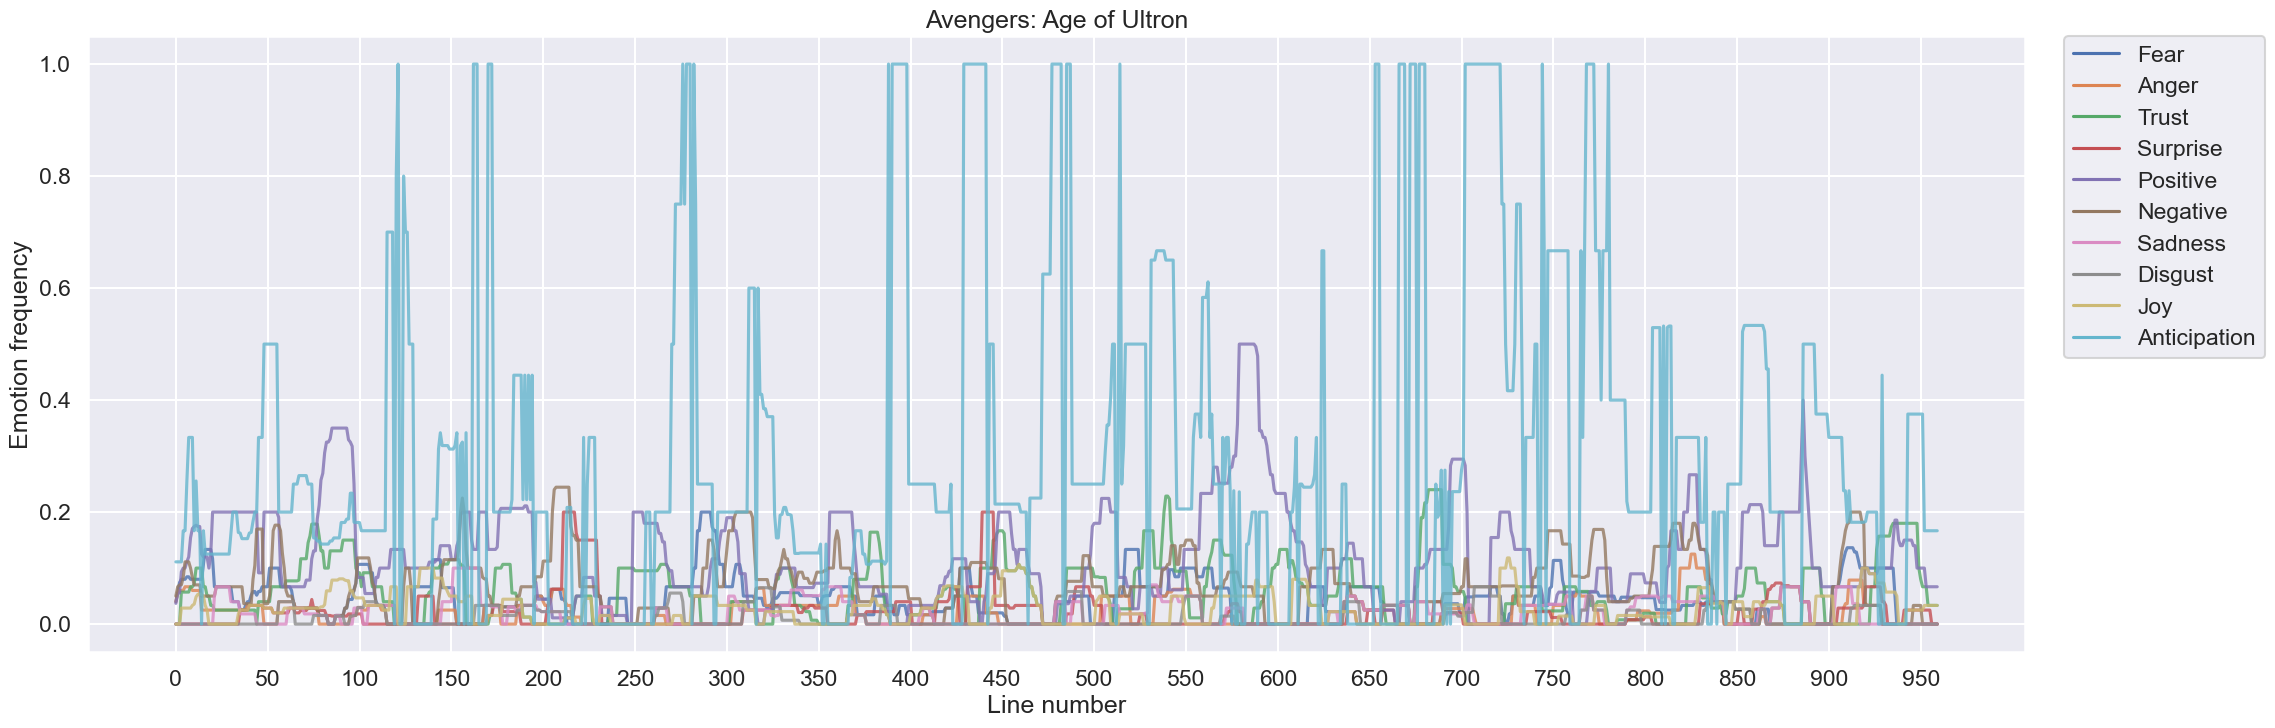

In [84]:
plt.figure(figsize=(25, 8))
sns.set_context("talk", font_scale=1)
sns.lineplot(data=nrc.iloc[:, 27:37], dashes=False, alpha=0.8)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(0, 1000, 50))
plt.xlabel('Line number')
plt.ylabel('Emotion frequency')
plt.title('Avengers: Age of Ultron')
plt.show()
# plot.legend(loc='upper right')

## Whole movie

<AxesSubplot:title={'center':'Avengers: Age of Ultron'}, xlabel='Emotion Frequency', ylabel='Emotion Classification'>

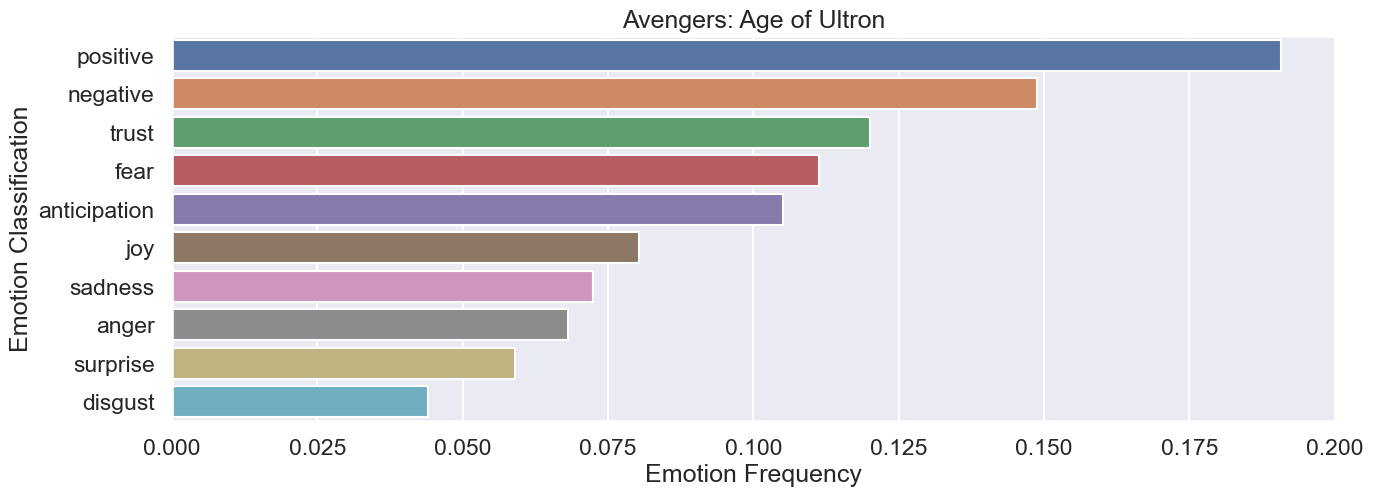

In [85]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

frequency_data = all_line_text_object.affect_frequencies
frequency_df = pd.DataFrame.from_dict(frequency_data, orient='index')
frequency_df = frequency_df.reset_index()
frequency_df = frequency_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
frequency_df = frequency_df.sort_values(by=['Emotion Frequency'], ascending=False)

frequency_df = frequency_df[frequency_df['Emotion Classification'] != 'anticip']

plt.figure(figsize=(15, 5))
plt.title('Avengers: Age of Ultron')
plt.xlim([0, 0.2])
sns.set_context("talk", font_scale=0.5)
sns.barplot(x='Emotion Frequency', y='Emotion Classification', data=frequency_df)

<AxesSubplot:title={'center':'Avengers: Age of Ultron'}, xlabel='Emotion Count', ylabel='Emotion Classification'>

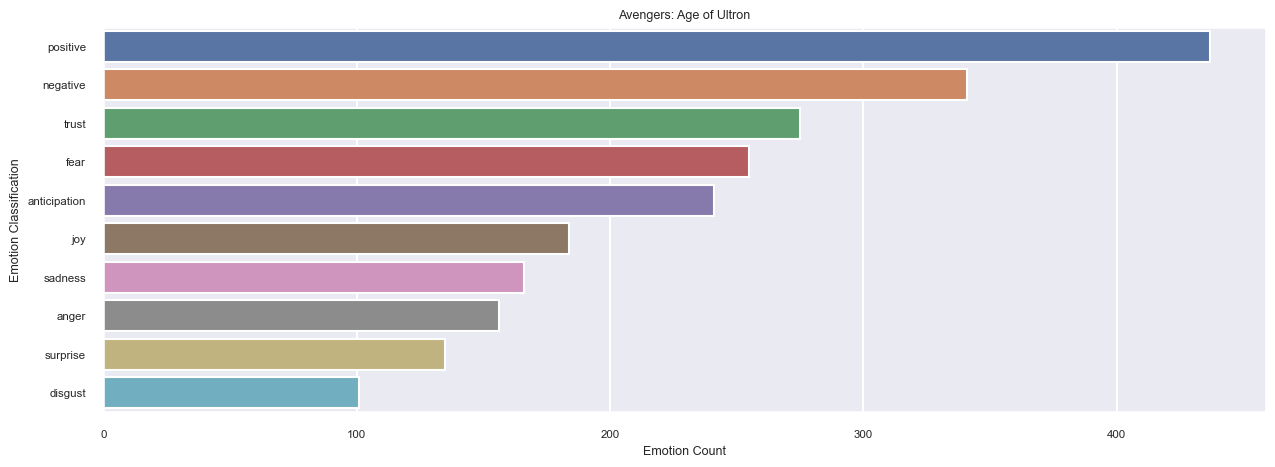

In [86]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

score_data = all_line_text_object.raw_emotion_scores
score_df = pd.DataFrame.from_dict(score_data, orient='index')
score_df = score_df.reset_index()
score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Count'})
score_df = score_df.sort_values(by=['Emotion Count'], ascending=False)

score_df

plt.figure(figsize=(15, 5))
plt.title('Avengers: Age of Ultron')
sns.set_context("talk", font_scale=1)
sns.barplot(x='Emotion Count', y='Emotion Classification', data=score_df)

In [87]:
# Export csv files
score_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/ageOfUltronEmotion.csv',
              index=False)

In [88]:
score_df

Emotion Classification  Emotion Count
2               positive            437
1               negative            341
6                  trust            275
4                   fear            255
0           anticipation            241
5                    joy            184
8                sadness            166
3                  anger            156
9               surprise            135
7                disgust            101

## By characters

In [89]:
nrc.head()

lineNum     character                                               line  \
0        1     ANNOUNCER  Report to your stations immediately. This is n...   
1        2    TONY STARK                                              Shit!   
2        3  STEVE ROGERS   Language! JARVIS, what's the view from upstairs?   
3        4        JARVIS  The central building is protected by some kind...   
4        5          THOR  Loki's scepter must be here. Strucker couldn't...   

                                          clean_line  \
0  Report to your stations immediately This is no...   
1                                               Shit   
2       Language JARVIS whats the view from upstairs   
3  The central building is protected by some kind...   
4  Lokis scepter must be here Strucker couldnt mo...   

                                          POS tagged  \
0  [(Report, n), (stations, n), (immediately, r),...   
1                                        [(Shit, n)]   
2  [(Language, n), (JARVIS, n), (whats, v), (view...   
3  [(central, a), (building, n), (protected, v), ...   
4  [(Lokis, n), (scepter, n), (must, None), (Stru...   

                                               Lemma  \
0     Report station immediately drill attack attack   
1                                               Shit   
2                Language JARVIS whats view upstairs   
3    central building protect kind energy shield ...   
4    Lokis scepter must Strucker couldnt mount de...   

                                text_object      fear     anger     trust  \
0  <nrclex.NRCLex object at 0x7fb5d8e70f10>  0.222222  0.222222  0.000000   
1  <nrclex.NRCLex object at 0x7fb5d8e70040>  0.000000  0.000000  0.000000   
2  <nrclex.NRCLex object at 0x7fb5d8e70ee0>  0.000000  0.000000  0.000000   
3  <nrclex.NRCLex object at 0x7fb5d8e70fa0>  0.000000  0.000000  0.285714   
4  <nrclex.NRCLex object at 0x7fb5d8e74070>  0.200000  0.200000  0.000000   

   ...      Fear     Anger     Trust  Surprise  Positive  Negative  Sadness  \
0  ...  0.040000  0.040000  0.000000       0.0  0.037037  0.050000      0.0   
1  ...  0.055556  0.055556  0.000000       0.0  0.055556  0.066667      0.0   
2  ...  0.074074  0.060000  0.000000       0.0  0.055556  0.070000      0.0   
3  ...  0.080000  0.060000  0.057143       0.0  0.093333  0.070000      0.0   
4  ...  0.080000  0.060000  0.057143       0.0  0.100000  0.083333      0.0   

   Disgust       Joy  Anticipation  
0      0.0  0.000000      0.111111  
1      0.0  0.000000      0.111111  
2      0.0  0.000000      0.111111  
3      0.0  0.028571      0.111111  
4      0.0  0.028571      0.166667  

[5 rows x 37 columns]

In [90]:
char_most_line = ['TONY STARK', 'THOR', 'ULTRON', 'STEVE ROGERS', 'BRUCE BANNER', 'NATASHA ROMANOFF']

In [91]:
# Initiate dataframe
char_df = pd.DataFrame()

for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    text_object = NRCLex(" ".join(line for line in all_line))
    
    score_data = text_object.affect_frequencies

    score_df = pd.DataFrame.from_dict(score_data, orient='index')
    score_df = score_df.reset_index()
    score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
    score_df['character'] = char
    char_df = char_df.append(score_df, ignore_index=True)

In [92]:
char_df = char_df[char_df['Emotion Classification'] != 'anticip']

Text(0.5, 1.0, 'Avengers: Age of Ultron')

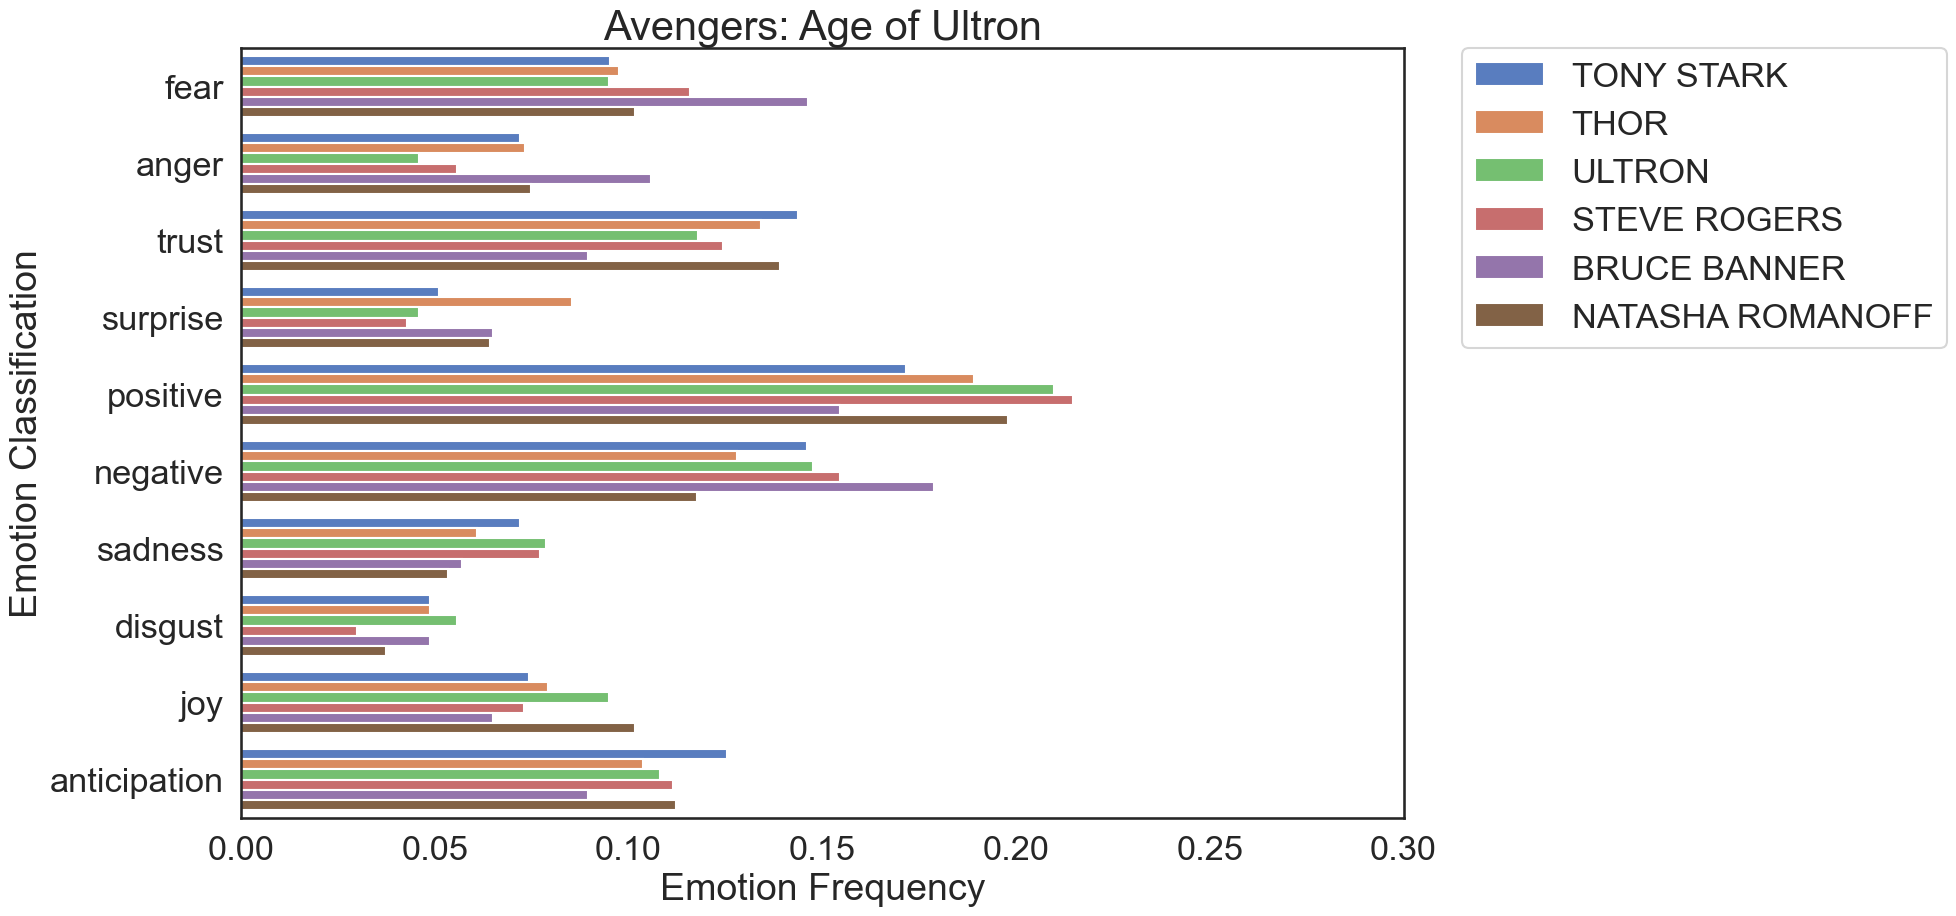

In [93]:
plt.figure(figsize=(15, 10))
sns.set_style("white")
sns.set_context("talk", font_scale=1.5)
sns.barplot(x='Emotion Frequency', y='Emotion Classification', palette='muted', hue='character', data=char_df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 0.3])
plt.title('Avengers: Age of Ultron', fontsize=30)

In [94]:
# Export csv files
char_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/ageOfUltronCharDF.csv',
              index=False)

# Test

In [95]:
for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    all_line_sentence = " ".join(line for line in all_line)
    all_line_token = word_tokenize(all_line_sentence)
    allWordDist = nltk.FreqDist(w.lower() for w in all_line_token)
    mostCommon = allWordDist.most_common(10)
    print(char, ':\n', mostCommon)
#     score_data = text_object.affect_frequencies

#     score_df = pd.DataFrame.from_dict(score_data, orient='index')
#     score_df = score_df.reset_index()
#     score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
#     score_df['character'] = char
#     char_df = char_df.append(score_df, ignore_index=True)

TONY STARK :
 [('get', 33), ('go', 17), ('know', 15), ('right', 15), ('one', 13), ('na', 13), ('dont', 13), ('jarvis', 12), ('well', 11), ('youre', 11)]
THOR :
 [('well', 6), ('yes', 5), ('mind', 5), ('scepter', 4), ('uh', 4), ('thats', 4), ('stone', 4), ('last', 3), ('go', 3), ('stark', 3)]
ULTRON :
 [('im', 19), ('youre', 9), ('world', 8), ('think', 8), ('dont', 7), ('see', 7), ('make', 7), ('get', 6), ('mean', 6), ('look', 6)]
STEVE ROGERS :
 [('get', 16), ('well', 14), ('know', 11), ('go', 10), ('us', 10), ('stark', 9), ('ultron', 9), ('right', 8), ('strucker', 7), ('dont', 7)]
BRUCE BANNER :
 [('go', 7), ('dont', 6), ('like', 6), ('ultron', 5), ('get', 5), ('want', 4), ('jarvis', 4), ('oh', 4), ('world', 4), ('natasha', 4)]
NATASHA ROMANOFF :
 [('go', 9), ('guy', 8), ('need', 6), ('get', 6), ('know', 5), ('im', 5), ('way', 5), ('want', 4), ('hey', 4), ('like', 4)]


## N-gram

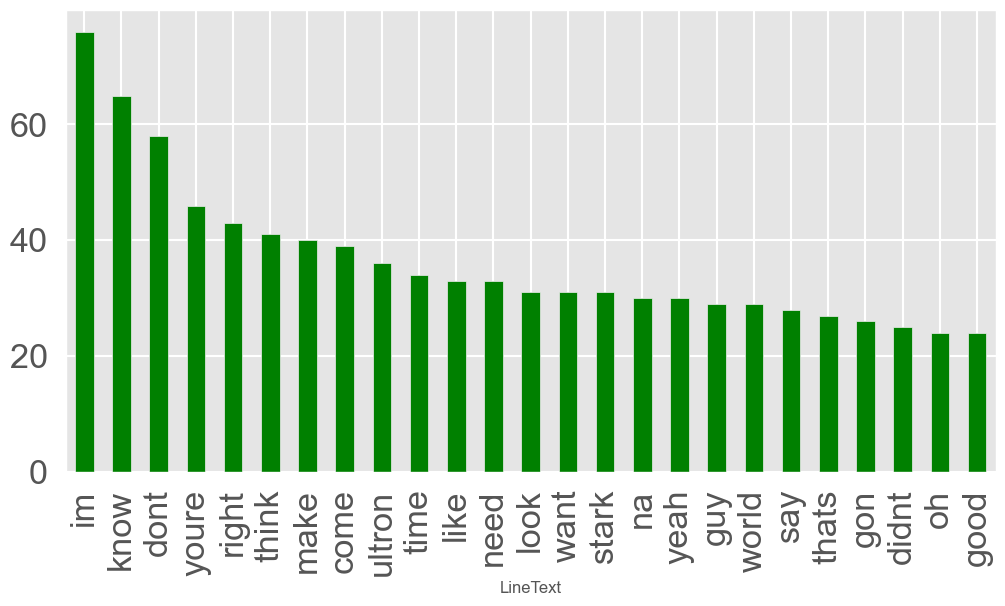

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

mpl.style.use('ggplot')
common_words = get_top_n_words(script['Lemma'], 25)
df1 = pd.DataFrame(common_words, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df1.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(color='green')
plt.show()

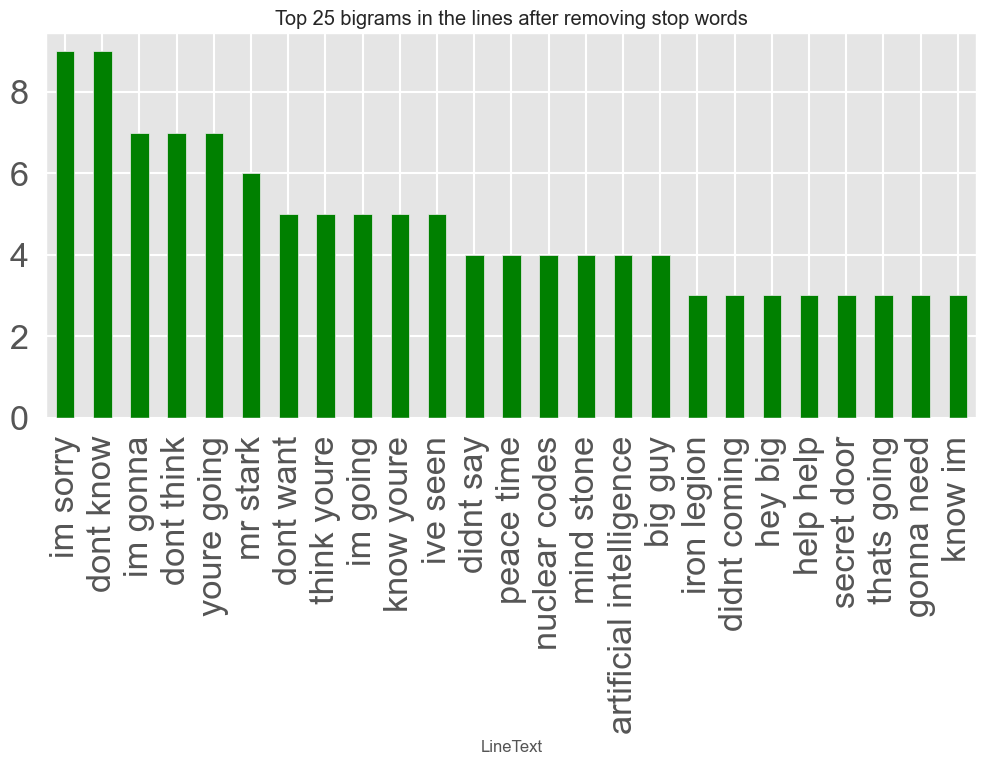

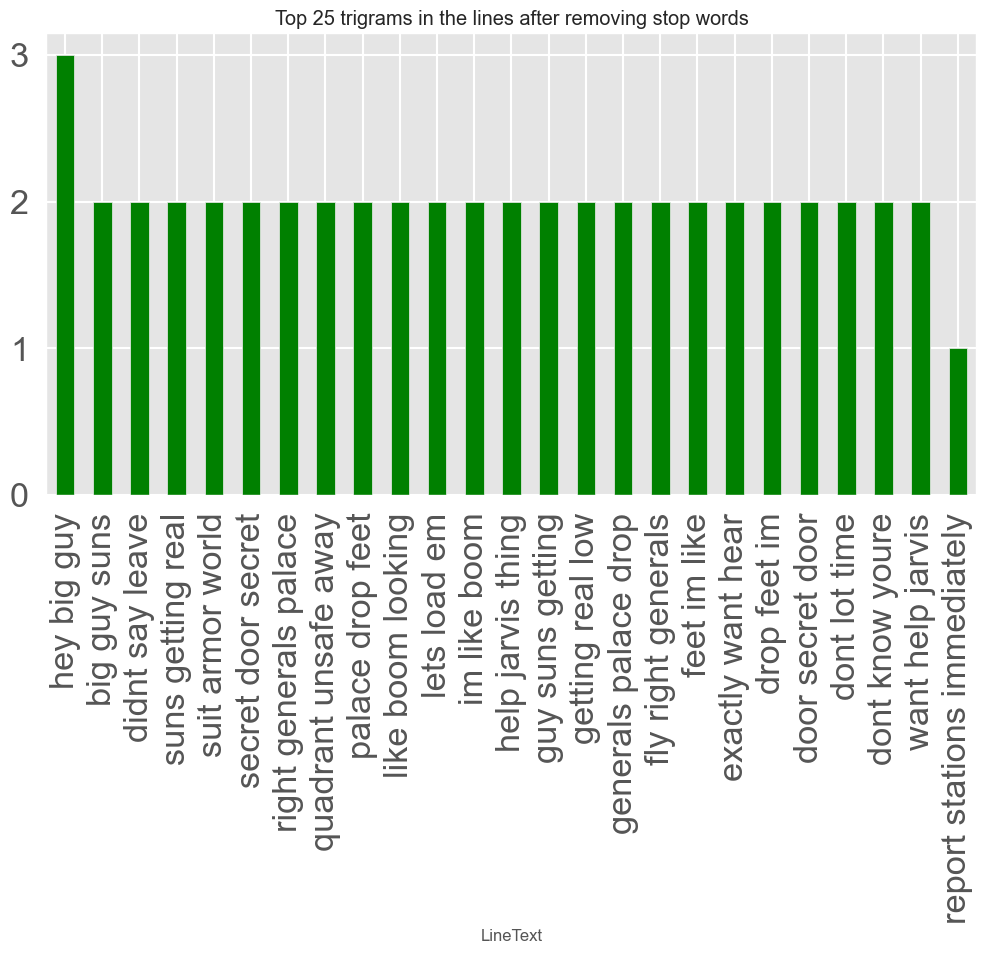

In [97]:
def get_top_k_n_gram(corpus, k=None, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]

common_bigrams = get_top_k_n_gram(script['clean_line'], 25,2)
df3 = pd.DataFrame(common_bigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,5))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 bigrams in the lines after removing stop words',color='green')
plt.show()

common_trigrams = get_top_k_n_gram(script['clean_line'], 25,3)
df3 = pd.DataFrame(common_trigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 trigrams in the lines after removing stop words',color='green')
plt.show()